In [1]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import ttest_ind
import numpy as np
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

# Reading Louisville Crime df

In [2]:
louisville_crime_df=pd.read_csv('../data/Louisville_Data/New_Louisville_Metro_KY_-_Crime_Data_2023.csv')


/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_56248/2125740286.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  louisville_crime_df=pd.read_csv('../data/Louisville_Data/New_Louisville_Metro_KY_-_Crime_Data_2023.csv')


In [116]:
louisville_crime_df.head() #69606 rows × 18 columns

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,LMPD_Beat,Location_Category,Block_Address,City,Zip_Code,ObjectId,Offense,Classification
0,LMPD24005671,1/16/2024,2023/11/03 04:00:00+00,5620.0,14 AUTO THEFT,"TBUT OR DISP AUTO $10,000 < $1,000,000 514.030...",240,A,Yes,2nd Division,223,Commercial/Office Building,1000 BLOCK S 9TH ST,LOUISVILLE,40203,1,14,AUTO THEFT
1,LMPD24005377,1/15/2024,2023/12/30 05:00:00+00,5619.0,23 THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,Yes,2nd Division,211,Residence/Home,300 BLOCK LOUIS COLEMAN JR DR,LOUISVILLE,40212,2,23,THEFT OTHER
2,LMPD24005367,1/15/2024,2023/11/10 05:00:00+00,5577.0,23 THEFT OTHER,"TBUT OR DISP ALL OTHERS $500 < $1,000 514.030 ...",23H,A,Yes,6th Division,612,Residence/Home,4100 BLOCK QUIET WAY,LOUISVILLE,40219,3,23,THEFT OTHER
3,LMPD24005344,1/15/2024,2023/01/10 05:00:00+00,8373.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,Yes,6th Division,625,Parking/ Drop Lot/ Garage,2900 BLOCK HIKES LN,LOUISVILLE,40220,4,14,AUTO THEFT
4,LMPD24005434,1/15/2024,2023/12/29 05:00:00+00,5621.0,22 THEFT MV PARTS,THEFT OF MOTOR VEHICLE REGISTRATION PLATE/DECA...,23G,A,Yes,7th Division,736,Parking/ Drop Lot/ Garage,8300 BLOCK PRESTONVIEW LN,LOUISVILLE,40219,5,22,THEFT MV PARTS


# read Louisville unemployment csv

In [4]:
louisville_unemployment_df=pd.read_csv('../data/Louisville_Data/Unemployment Rate_Louisville_Jefferson County.csv') 
louisville_unemployment_df.head(3)

,Series ID,Year,Period,Label,Value
0,LAUMT213114000000003,2021,M01,2021 Jan,5.1
1,LAUMT213114000000003,2021,M02,2021 Feb,4.6
2,LAUMT213114000000003,2021,M03,2021 Mar,4.6


In [5]:
louisville_unemployment_df[['Year', 'Month']] = louisville_unemployment_df['Label'].str.split(' ', expand=True)
louisville_unemployment_df.head()

,Series ID,Year,Period,Label,Value,Month
0,LAUMT213114000000003,2021,M01,2021 Jan,5.1,Jan
1,LAUMT213114000000003,2021,M02,2021 Feb,4.6,Feb
2,LAUMT213114000000003,2021,M03,2021 Mar,4.6,Mar
3,LAUMT213114000000003,2021,M04,2021 Apr,4.2,Apr
4,LAUMT213114000000003,2021,M05,2021 May,3.8,May


extracting from the M01 column and creating a new column Month

In [6]:
louisville_unemployment_df.rename(columns={'Value': 'Unemployed Rate'}, inplace=True)
louisville_unemployment_df.tail(5)

,Series ID,Year,Period,Label,Unemployed Rate,Month
31,LAUMT213114000000003,2023,M08,2023 Aug,3.8,Aug
32,LAUMT213114000000003,2023,M09,2023 Sep,3.7,Sep
33,LAUMT213114000000003,2023,M10,2023 Oct,3.4,Oct
34,LAUMT213114000000003,2023,M11,2023 Nov,3.6,Nov
35,LAUMT213114000000003,2023,M12,2023 Dec,3.3,Dec


In [7]:
louisville_unemployment_df[louisville_unemployment_df['Year'] == "2023"]

,Series ID,Year,Period,Label,Unemployed Rate,Month
24,LAUMT213114000000003,2023,M01,2023 Jan,3.8,Jan
25,LAUMT213114000000003,2023,M02,2023 Feb,4.1,Feb
26,LAUMT213114000000003,2023,M03,2023 Mar,3.5,Mar
27,LAUMT213114000000003,2023,M04,2023 Apr,2.8,Apr
28,LAUMT213114000000003,2023,M05,2023 May,3.4,May
29,LAUMT213114000000003,2023,M06,2023 Jun,3.8,Jun
30,LAUMT213114000000003,2023,M07,2023 Jul,4.1,Jul
31,LAUMT213114000000003,2023,M08,2023 Aug,3.8,Aug
32,LAUMT213114000000003,2023,M09,2023 Sep,3.7,Sep
33,LAUMT213114000000003,2023,M10,2023 Oct,3.4,Oct


Filtering to extract only year=2023

In [8]:
louisville_unemployment_df_2023 = louisville_unemployment_df[louisville_unemployment_df['Year'] == "2023"]
louisville_unemployment_df_2023.head()

,Series ID,Year,Period,Label,Unemployed Rate,Month
24,LAUMT213114000000003,2023,M01,2023 Jan,3.8,Jan
25,LAUMT213114000000003,2023,M02,2023 Feb,4.1,Feb
26,LAUMT213114000000003,2023,M03,2023 Mar,3.5,Mar
27,LAUMT213114000000003,2023,M04,2023 Apr,2.8,Apr
28,LAUMT213114000000003,2023,M05,2023 May,3.4,May


In [9]:
louisville_unemployment_df_2023=louisville_unemployment_df_2023[['Year', 'Unemployed Rate', 'Month']]
louisville_unemployment_df_2023.head()

,Year,Unemployed Rate,Month
24,2023,3.8,Jan
25,2023,4.1,Feb
26,2023,3.5,Mar
27,2023,2.8,Apr
28,2023,3.4,May


In [10]:
louisville_crime_df.columns

Index(['Incident_Number', 'Date_Reported', 'Date_Occurred', 'Badge_ID',
       'Offense_Classification', 'Offense_Code_Name', 'NIBRS_Code',
       'NIBRS_Group', 'Was_Offense_Completed', 'LMPD_Division', 'LMPD_Beat',
       'Location_Category', 'Block_Address', 'City', 'Zip_Code', 'ObjectId'],
      dtype='object')

In [11]:
# louisville_crime_df['Offense_Classification']=louisville_crime_df['Offense_Classification'].dropna
# louisville_crime_df['Offense_Classification']
louisville_crime_df.head(4)

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,LMPD_Beat,Location_Category,Block_Address,City,Zip_Code,ObjectId
0,LMPD24005671,1/16/2024,2023/11/03 04:00:00+00,5620.0,14 AUTO THEFT,"TBUT OR DISP AUTO $10,000 < $1,000,000 514.030...",240,A,Yes,2nd Division,223,Commercial/Office Building,1000 BLOCK S 9TH ST,LOUISVILLE,40203,1
1,LMPD24005377,1/15/2024,2023/12/30 05:00:00+00,5619.0,23 THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,Yes,2nd Division,211,Residence/Home,300 BLOCK LOUIS COLEMAN JR DR,LOUISVILLE,40212,2
2,LMPD24005367,1/15/2024,2023/11/10 05:00:00+00,5577.0,23 THEFT OTHER,"TBUT OR DISP ALL OTHERS $500 < $1,000 514.030 ...",23H,A,Yes,6th Division,612,Residence/Home,4100 BLOCK QUIET WAY,LOUISVILLE,40219,3
3,LMPD24005344,1/15/2024,2023/01/10 05:00:00+00,8373.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,Yes,6th Division,625,Parking/ Drop Lot/ Garage,2900 BLOCK HIKES LN,LOUISVILLE,40220,4


In [12]:
louisville_crime_df['Offense_Classification'].unique()

array(['14 AUTO THEFT', '23 THEFT OTHER', '22 THEFT MV PARTS',
       '26 COUNTERFEITING', '29 FRAUD IMPERSONATION', '21 THEFT FR VEH',
       '28 FRAUD CREDIT CARD/ATM', '32 THEFT FR BLDG', '32 EMBEZZLEMENT',
       '23 LARCENY', '12 INTIMIDATION', '56 ALL OTHER OFFENSES',
       '19 THEFT FR BLDG', '13 BURGLARY', '18 SHOPLIFTING',
       '24 VANDALISM', '27 FRAUD', '11 SIMPLE ASSAULT',
       '9 AGGRAVATED ASSAULT', '51 DISORDERLY CONDUCT', '34 NARCOTICS',
       '99 NON-REPORTABLE', '10 KIDNAPPING ONLY', '33 STOLEN PROPERTY',
       '35 NARCOTICS EQUIP', '50 DRUNK DRIVING', '8 ROBBERY',
       '15 UNAUTHORIZED USE', nan, '46 WPNS LAW VIOLATION',
       '46 FAMILY OFFENSES', '47 FAMILY OFFENSES', '43 PROSTITUTION',
       '55 TRESPASSING', '16 PURSE SNATCH', '4 FORCIBLE RAPE',
       '1 HOMICIDE', '17 PICK POCKET', '20 THEFT FR VEND MACHINE',
       '5 SODOMY FORCE', '54 VOYEURISM', '38 PORNOGRAPHY', '25 EXTORTION',
       '52 DRUNKENNESS', '3 JUSTIFIABLE HOMICIDE', '37 STAT RAPE',
 

In [13]:
louisville_crime_df['Offense_Classification']

0                14 AUTO THEFT
1               23 THEFT OTHER
2               23 THEFT OTHER
3                14 AUTO THEFT
4            22 THEFT MV PARTS
                 ...          
69613    46 WPNS LAW VIOLATION
69614             34 NARCOTICS
69615             34 NARCOTICS
69616    46 WPNS LAW VIOLATION
69617       35 NARCOTICS EQUIP
Name: Offense_Classification, Length: 69618, dtype: object

# Filtering and Cleaning

In [14]:
#df[['Number', 'Text']] = df['column_name'].str.split(' ', 1, expand=True)
#louisville_crime_df[['Offense','Classification']]=louisville_crime_df['Offense_Classification'].str.split(' ', expand=True)
louisville_crime_df[['Offense', 'Classification']] = louisville_crime_df['Offense_Classification'].str.split(' ', n=1, expand=True)
louisville_crime_df.head(4)

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,LMPD_Beat,Location_Category,Block_Address,City,Zip_Code,ObjectId,Offense,Classification
0,LMPD24005671,1/16/2024,2023/11/03 04:00:00+00,5620.0,14 AUTO THEFT,"TBUT OR DISP AUTO $10,000 < $1,000,000 514.030...",240,A,Yes,2nd Division,223,Commercial/Office Building,1000 BLOCK S 9TH ST,LOUISVILLE,40203,1,14,AUTO THEFT
1,LMPD24005377,1/15/2024,2023/12/30 05:00:00+00,5619.0,23 THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,Yes,2nd Division,211,Residence/Home,300 BLOCK LOUIS COLEMAN JR DR,LOUISVILLE,40212,2,23,THEFT OTHER
2,LMPD24005367,1/15/2024,2023/11/10 05:00:00+00,5577.0,23 THEFT OTHER,"TBUT OR DISP ALL OTHERS $500 < $1,000 514.030 ...",23H,A,Yes,6th Division,612,Residence/Home,4100 BLOCK QUIET WAY,LOUISVILLE,40219,3,23,THEFT OTHER
3,LMPD24005344,1/15/2024,2023/01/10 05:00:00+00,8373.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,Yes,6th Division,625,Parking/ Drop Lot/ Garage,2900 BLOCK HIKES LN,LOUISVILLE,40220,4,14,AUTO THEFT


In [15]:
top_ten_crime=louisville_crime_df['Classification'].value_counts().head(20)
top_ten_crime

Classification
ALL OTHER OFFENSES       7833
AUTO THEFT               6939
SIMPLE ASSAULT           6826
VANDALISM                6552
THEFT OTHER              4641
INTIMIDATION             4386
THEFT FR VEH             3948
BURGLARY                 3429
AGGRAVATED ASSAULT       3378
SHOPLIFTING              2641
NARCOTICS                2574
NON-REPORTABLE           2270
LARCENY                  1587
FAMILY OFFENSES          1540
THEFT MV PARTS           1466
THEFT FR BLDG            1448
FRAUD CREDIT CARD/ATM    1026
ROBBERY                  1026
STOLEN PROPERTY           835
NARCOTICS EQUIP           741
Name: count, dtype: int64

(<Axes: title={'center': 'Top Ten Crime in Louisville'}, ylabel='Classification'>,
 None)

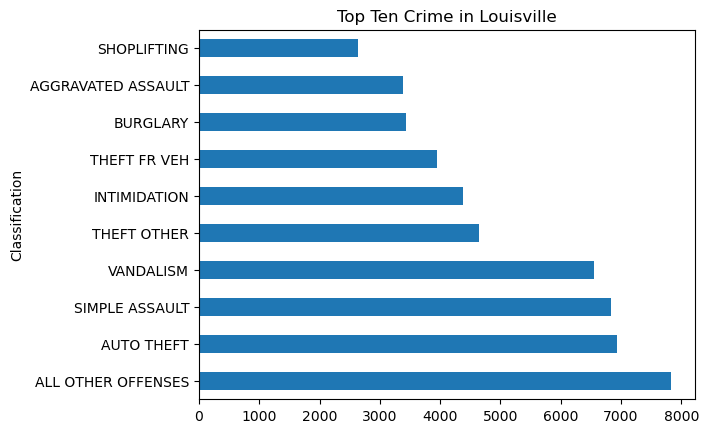

In [16]:
#top ten crime in Louisville
louisville_crime_df['Classification'].value_counts().head(10).plot(kind="barh", title = "Top Ten Crime in Louisville"), plt.savefig('Top Ten Crime in Louisville.png', bbox_inches='tight')

# cleaning the zip code row to remove any zip code that is not Louisville

In [17]:
louisville_crime_df['Zip_Code'].unique()

array(['40203', '40212', '40219', '40220', '40215', '40206', '40222',
       '40228', '40241', '40209', '40272', '40213', '40299', '40205',
       '40177', '40202', '40210', '40211', '40214', '40291', '40243',
       '40217', '40207', '40223', '40218', '40245', '40258', '40204',
       '40059', '40229', '40041', '40242', '40216', '40208', nan,
       '40291 0000', '40214-0000', '40211 0000', '40023', '40118',
       '40018', '40217 0000', '40272 0000', '40220 0000', '40215 0000',
       '40208 0000', '402110000', '40222-0000', '40146', '40212 0000',
       '99999', '42701', '40223 0000', '40214 0000', '40258 0000',
       '40216 0000', '11590', '40225', '85036', '402580000', '40245 0000',
       '40258-0000', '40219 0000', '40291-0000', '40205 0000', '40114',
       '47720', '40215-0000', '40165', '40210 0000', '40272-0000',
       '40210-0000', 'UNKOWN', '40211-0000', '40241 0000', '40220-0000',
       '40245-0000', '40014', '40108', '40209-0000', '40242-0000',
       '40229 0000', '4

In [18]:
louisville_crime_df.dropna(subset=['Zip_Code'], inplace=True)
louisville_crime_df['Zip_Code'].unique()

array(['40203', '40212', '40219', '40220', '40215', '40206', '40222',
       '40228', '40241', '40209', '40272', '40213', '40299', '40205',
       '40177', '40202', '40210', '40211', '40214', '40291', '40243',
       '40217', '40207', '40223', '40218', '40245', '40258', '40204',
       '40059', '40229', '40041', '40242', '40216', '40208', '40291 0000',
       '40214-0000', '40211 0000', '40023', '40118', '40018',
       '40217 0000', '40272 0000', '40220 0000', '40215 0000',
       '40208 0000', '402110000', '40222-0000', '40146', '40212 0000',
       '99999', '42701', '40223 0000', '40214 0000', '40258 0000',
       '40216 0000', '11590', '40225', '85036', '402580000', '40245 0000',
       '40258-0000', '40219 0000', '40291-0000', '40205 0000', '40114',
       '47720', '40215-0000', '40165', '40210 0000', '40272-0000',
       '40210-0000', 'UNKOWN', '40211-0000', '40241 0000', '40220-0000',
       '40245-0000', '40014', '40108', '40209-0000', '40242-0000',
       '40229 0000', '40222 

In [19]:
louisville_crime_df['Zip_Code'] = louisville_crime_df['Zip_Code'].astype(str).str.replace('-0000', '')
louisville_crime_df['Zip_Code'].unique()

array(['40203', '40212', '40219', '40220', '40215', '40206', '40222',
       '40228', '40241', '40209', '40272', '40213', '40299', '40205',
       '40177', '40202', '40210', '40211', '40214', '40291', '40243',
       '40217', '40207', '40223', '40218', '40245', '40258', '40204',
       '40059', '40229', '40041', '40242', '40216', '40208', '40291 0000',
       '40211 0000', '40023', '40118', '40018', '40217 0000',
       '40272 0000', '40220 0000', '40215 0000', '40208 0000',
       '402110000', '40146', '40212 0000', '99999', '42701', '40223 0000',
       '40214 0000', '40258 0000', '40216 0000', '11590', '40225',
       '85036', '402580000', '40245 0000', '40219 0000', '40205 0000',
       '40114', '47720', '40165', '40210 0000', 'UNKOWN', '40241 0000',
       '40014', '40108', '40229 0000', '40222 0000', '40059 0000',
       '402150000', '40203 0000', '40242 0000', '5158', '40299 0000',
       '40231', '40025', '402190000', '40202 0000', '40218 0000', '40071',
       '40271', '40175'

In [20]:
louisville_crime_df['Zip_Code'] = louisville_crime_df['Zip_Code'].astype(str).str.replace('0000$', '', regex=True)
louisville_crime_df['Zip_Code'].unique()

array(['40203', '40212', '40219', '40220', '40215', '40206', '40222',
       '40228', '40241', '40209', '40272', '40213', '40299', '40205',
       '40177', '40202', '40210', '40211', '40214', '40291', '40243',
       '40217', '40207', '40223', '40218', '40245', '40258', '40204',
       '40059', '40229', '40041', '40242', '40216', '40208', '40291 ',
       '40211 ', '40023', '40118', '40018', '40217 ', '40272 ', '40220 ',
       '40215 ', '40208 ', '40146', '40212 ', '99999', '42701', '40223 ',
       '40214 ', '40258 ', '40216 ', '11590', '40225', '85036', '40245 ',
       '40219 ', '40205 ', '40114', '47720', '40165', '40210 ', 'UNKOWN',
       '40241 ', '40014', '40108', '40229 ', '40222 ', '40059 ', '40203 ',
       '40242 ', '5158', '40299 ', '40231', '40025', '40202 ', '40218 ',
       '40071', '40271', '40175', '40206 ', '40203`', '40228 ', '40118 ',
       '47130 ', '40213 ', '0', '47129', '40047', '47150', '40056',
       '40207 ', '45424', '402211', '40243 ', 'UNKNOWN', '2015'

In [21]:
louisville_crime_df['Zip_Code'] = louisville_crime_df['Zip_Code'].replace('402018', '40218')
louisville_crime_df['Zip_Code'].unique()

array(['40203', '40212', '40219', '40220', '40215', '40206', '40222',
       '40228', '40241', '40209', '40272', '40213', '40299', '40205',
       '40177', '40202', '40210', '40211', '40214', '40291', '40243',
       '40217', '40207', '40223', '40218', '40245', '40258', '40204',
       '40059', '40229', '40041', '40242', '40216', '40208', '40291 ',
       '40211 ', '40023', '40118', '40018', '40217 ', '40272 ', '40220 ',
       '40215 ', '40208 ', '40146', '40212 ', '99999', '42701', '40223 ',
       '40214 ', '40258 ', '40216 ', '11590', '40225', '85036', '40245 ',
       '40219 ', '40205 ', '40114', '47720', '40165', '40210 ', 'UNKOWN',
       '40241 ', '40014', '40108', '40229 ', '40222 ', '40059 ', '40203 ',
       '40242 ', '5158', '40299 ', '40231', '40025', '40202 ', '40218 ',
       '40071', '40271', '40175', '40206 ', '40203`', '40228 ', '40118 ',
       '47130 ', '40213 ', '0', '47129', '40047', '47150', '40056',
       '40207 ', '45424', '402211', '40243 ', 'UNKNOWN', '2015'

In [22]:
zip_codes_to_remove = ['0','47130','5158','99999','2015','46794', '10218','45424', '85036','05158','50258', '61201', '47130','10218', '38122', '99999','47720','47124', '47150', '402211', '11590','02015', '47129']
louisville_crime_df_filtered = louisville_crime_df[~louisville_crime_df['Zip_Code'].isin(zip_codes_to_remove)]

In [23]:
louisville_crime_df_filtered.head()

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,LMPD_Beat,Location_Category,Block_Address,City,Zip_Code,ObjectId,Offense,Classification
0,LMPD24005671,1/16/2024,2023/11/03 04:00:00+00,5620.0,14 AUTO THEFT,"TBUT OR DISP AUTO $10,000 < $1,000,000 514.030...",240,A,Yes,2nd Division,223,Commercial/Office Building,1000 BLOCK S 9TH ST,LOUISVILLE,40203,1,14,AUTO THEFT
1,LMPD24005377,1/15/2024,2023/12/30 05:00:00+00,5619.0,23 THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,Yes,2nd Division,211,Residence/Home,300 BLOCK LOUIS COLEMAN JR DR,LOUISVILLE,40212,2,23,THEFT OTHER
2,LMPD24005367,1/15/2024,2023/11/10 05:00:00+00,5577.0,23 THEFT OTHER,"TBUT OR DISP ALL OTHERS $500 < $1,000 514.030 ...",23H,A,Yes,6th Division,612,Residence/Home,4100 BLOCK QUIET WAY,LOUISVILLE,40219,3,23,THEFT OTHER
3,LMPD24005344,1/15/2024,2023/01/10 05:00:00+00,8373.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,Yes,6th Division,625,Parking/ Drop Lot/ Garage,2900 BLOCK HIKES LN,LOUISVILLE,40220,4,14,AUTO THEFT
4,LMPD24005434,1/15/2024,2023/12/29 05:00:00+00,5621.0,22 THEFT MV PARTS,THEFT OF MOTOR VEHICLE REGISTRATION PLATE/DECA...,23G,A,Yes,7th Division,736,Parking/ Drop Lot/ Garage,8300 BLOCK PRESTONVIEW LN,LOUISVILLE,40219,5,22,THEFT MV PARTS


In [24]:
louisville_crime_df_filtered['Zip_Code'].unique()

array(['40203', '40212', '40219', '40220', '40215', '40206', '40222',
       '40228', '40241', '40209', '40272', '40213', '40299', '40205',
       '40177', '40202', '40210', '40211', '40214', '40291', '40243',
       '40217', '40207', '40223', '40218', '40245', '40258', '40204',
       '40059', '40229', '40041', '40242', '40216', '40208', '40291 ',
       '40211 ', '40023', '40118', '40018', '40217 ', '40272 ', '40220 ',
       '40215 ', '40208 ', '40146', '40212 ', '42701', '40223 ', '40214 ',
       '40258 ', '40216 ', '40225', '40245 ', '40219 ', '40205 ', '40114',
       '40165', '40210 ', 'UNKOWN', '40241 ', '40014', '40108', '40229 ',
       '40222 ', '40059 ', '40203 ', '40242 ', '40299 ', '40231', '40025',
       '40202 ', '40218 ', '40071', '40271', '40175', '40206 ', '40203`',
       '40228 ', '40118 ', '47130 ', '40213 ', '40047', '40056', '40207 ',
       '40243 ', 'UNKNOWN', '40209 ', '40201', '40258 3819', 'OT',
       '40205.0', '40206.0', '40213.0', '40212.0', '40210.0'

In [25]:
# Convert 'Zip_Code' to strings, removing any decimal parts, and handle NaN values
louisville_crime_df_filtered['Zip_Code'] = pd.to_numeric(louisville_crime_df_filtered['Zip_Code'], errors='coerce').fillna(-1).astype(int).astype(str)
# Optionally, replace '0' placeholders for NaN values with a more appropriate representation, like an empty string
louisville_crime_df_filtered['Zip_Code'] = louisville_crime_df_filtered['Zip_Code'].replace('-1', np.nan)
louisville_crime_df_filtered['Zip_Code'].unique()

/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_56248/2979675418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  louisville_crime_df_filtered['Zip_Code'] = pd.to_numeric(louisville_crime_df_filtered['Zip_Code'], errors='coerce').fillna(-1).astype(int).astype(str)
/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_56248/2979675418.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  louisville_crime_df_filtered['Zip_Code'] = louisville_crime_df_filtered['Zip_Code'].replace('-1', np.nan)

array(['40203', '40212', '40219', '40220', '40215', '40206', '40222',
       '40228', '40241', '40209', '40272', '40213', '40299', '40205',
       '40177', '40202', '40210', '40211', '40214', '40291', '40243',
       '40217', '40207', '40223', '40218', '40245', '40258', '40204',
       '40059', '40229', '40041', '40242', '40216', '40208', '40023',
       '40118', '40018', '40146', '42701', '40225', '40114', '40165', nan,
       '40014', '40108', '40231', '40025', '40071', '40271', '40175',
       '47130', '40047', '40056', '40201', '99999'], dtype=object)

In [26]:
louisville_crime_df_filtered['Zip_Code'].dropna().unique()

array(['40203', '40212', '40219', '40220', '40215', '40206', '40222',
       '40228', '40241', '40209', '40272', '40213', '40299', '40205',
       '40177', '40202', '40210', '40211', '40214', '40291', '40243',
       '40217', '40207', '40223', '40218', '40245', '40258', '40204',
       '40059', '40229', '40041', '40242', '40216', '40208', '40023',
       '40118', '40018', '40146', '42701', '40225', '40114', '40165',
       '40014', '40108', '40231', '40025', '40071', '40271', '40175',
       '47130', '40047', '40056', '40201', '99999'], dtype=object)

# joining unemployment with crime df

# ANALYSIS- AUTO THEFT

In [27]:
crime_auto_theft =louisville_crime_df_filtered.loc[louisville_crime_df_filtered['Classification'].isin(['AUTO THEFT'])]
crime_auto_theft.head()

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,LMPD_Beat,Location_Category,Block_Address,City,Zip_Code,ObjectId,Offense,Classification
0,LMPD24005671,1/16/2024,2023/11/03 04:00:00+00,5620.0,14 AUTO THEFT,"TBUT OR DISP AUTO $10,000 < $1,000,000 514.030...",240,A,Yes,2nd Division,223,Commercial/Office Building,1000 BLOCK S 9TH ST,LOUISVILLE,40203,1,14,AUTO THEFT
3,LMPD24005344,1/15/2024,2023/01/10 05:00:00+00,8373.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,Yes,6th Division,625,Parking/ Drop Lot/ Garage,2900 BLOCK HIKES LN,LOUISVILLE,40220,4,14,AUTO THEFT
13,LMPD24004632,1/12/2024,2023/12/14 05:00:00+00,8560.0,14 AUTO THEFT,"TBUT OR DISP AUTO $10,000 < $1,000,000 514.030...",240,A,Yes,3rd Division,334,Rental Storage Facility,9000 BLOCK STONESTREET RD,LOUISVILLE,40272,14,14,AUTO THEFT
18,LMPD24004188,1/11/2024,2023/12/27 05:00:00+00,8373.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,Yes,3rd Division,316,Highway/ Road/ Alley/ Street/ Sidewalk,15900 BLOCK DIXIE HWY,LOUISVILLE,40177,19,14,AUTO THEFT
23,LMPD24003903,1/10/2024,2023/01/02 05:00:00+00,8544.0,14 AUTO THEFT,"TBUT OR DISP AUTO $10,000 < $1,000,000 514.030...",240,A,Yes,1st Division,112,Parking/ Drop Lot/ Garage,3000 BLOCK W BROADWAY,LOUISVILLE,40211,24,14,AUTO THEFT


In [28]:
# auto_theft_location=crime_auto_theft['Location_Category'].value_counts()
# auto_theft_location.head(15)

In [29]:
# crime_auto_location=crime_auto_theft.loc[crime_auto_theft['Location_Category'].isin(['Residence/Home'])]
# crime_auto_location

In [30]:
louisville_crime_df_filtered.head()

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,LMPD_Beat,Location_Category,Block_Address,City,Zip_Code,ObjectId,Offense,Classification
0,LMPD24005671,1/16/2024,2023/11/03 04:00:00+00,5620.0,14 AUTO THEFT,"TBUT OR DISP AUTO $10,000 < $1,000,000 514.030...",240,A,Yes,2nd Division,223,Commercial/Office Building,1000 BLOCK S 9TH ST,LOUISVILLE,40203,1,14,AUTO THEFT
1,LMPD24005377,1/15/2024,2023/12/30 05:00:00+00,5619.0,23 THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,Yes,2nd Division,211,Residence/Home,300 BLOCK LOUIS COLEMAN JR DR,LOUISVILLE,40212,2,23,THEFT OTHER
2,LMPD24005367,1/15/2024,2023/11/10 05:00:00+00,5577.0,23 THEFT OTHER,"TBUT OR DISP ALL OTHERS $500 < $1,000 514.030 ...",23H,A,Yes,6th Division,612,Residence/Home,4100 BLOCK QUIET WAY,LOUISVILLE,40219,3,23,THEFT OTHER
3,LMPD24005344,1/15/2024,2023/01/10 05:00:00+00,8373.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,Yes,6th Division,625,Parking/ Drop Lot/ Garage,2900 BLOCK HIKES LN,LOUISVILLE,40220,4,14,AUTO THEFT
4,LMPD24005434,1/15/2024,2023/12/29 05:00:00+00,5621.0,22 THEFT MV PARTS,THEFT OF MOTOR VEHICLE REGISTRATION PLATE/DECA...,23G,A,Yes,7th Division,736,Parking/ Drop Lot/ Garage,8300 BLOCK PRESTONVIEW LN,LOUISVILLE,40219,5,22,THEFT MV PARTS


In [31]:
#convert to datetime
louisville_crime_df_filtered['Date_Occurred'] = pd.to_datetime(louisville_crime_df_filtered['Date_Occurred'])
louisville_crime_df_filtered['Date_Occurred']

/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_56248/807193374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  louisville_crime_df_filtered['Date_Occurred'] = pd.to_datetime(louisville_crime_df_filtered['Date_Occurred'])


0       2023-11-03 04:00:00+00:00
1       2023-12-30 05:00:00+00:00
2       2023-11-10 05:00:00+00:00
3       2023-01-10 05:00:00+00:00
4       2023-12-29 05:00:00+00:00
                   ...           
69613   2023-05-12 04:00:00+00:00
69614   2023-04-21 04:00:00+00:00
69615   2023-09-26 04:00:00+00:00
69616   2023-08-24 04:00:00+00:00
69617   2023-05-12 04:00:00+00:00
Name: Date_Occurred, Length: 69542, dtype: datetime64[ns, UTC]

In [32]:
# Extracting the month number and creating 'Month Occured' column
louisville_crime_df_filtered['Month_Occured'] = louisville_crime_df_filtered['Date_Occurred'].dt.month

/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_56248/1290402688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  louisville_crime_df_filtered['Month_Occured'] = louisville_crime_df_filtered['Date_Occurred'].dt.month


In [33]:
import calendar

In [34]:
print(louisville_crime_df_filtered.columns)

Index(['Incident_Number', 'Date_Reported', 'Date_Occurred', 'Badge_ID',
       'Offense_Classification', 'Offense_Code_Name', 'NIBRS_Code',
       'NIBRS_Group', 'Was_Offense_Completed', 'LMPD_Division', 'LMPD_Beat',
       'Location_Category', 'Block_Address', 'City', 'Zip_Code', 'ObjectId',
       'Offense', 'Classification', 'Month_Occured'],
      dtype='object')


In [35]:
#extract month from the 'Date_Occurred' and convert to month name
louisville_crime_df_filtered['Month_Occured'] = louisville_crime_df_filtered['Month_Occured'].apply(lambda x: calendar.month_name[x])
louisville_crime_df_filtered['Month_Occured']

/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_56248/947834247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  louisville_crime_df_filtered['Month_Occured'] = louisville_crime_df_filtered['Month_Occured'].apply(lambda x: calendar.month_name[x])


0         November
1         December
2         November
3          January
4         December
           ...    
69613          May
69614        April
69615    September
69616       August
69617          May
Name: Month_Occured, Length: 69542, dtype: object

In [36]:
#creat a new column year
louisville_crime_df_filtered['Year Occured'] = louisville_crime_df_filtered['Date_Occurred'].dt.year
louisville_crime_df_filtered.head(1)

/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_56248/1423555378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  louisville_crime_df_filtered['Year Occured'] = louisville_crime_df_filtered['Date_Occurred'].dt.year


,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,LMPD_Beat,Location_Category,Block_Address,City,Zip_Code,ObjectId,Offense,Classification,Month_Occured,Year Occured
0,LMPD24005671,1/16/2024,2023-11-03 04:00:00+00:00,5620.0,14 AUTO THEFT,"TBUT OR DISP AUTO $10,000 < $1,000,000 514.030...",240,A,Yes,2nd Division,223,Commercial/Office Building,1000 BLOCK S 9TH ST,LOUISVILLE,40203,1,14,AUTO THEFT,November,2023


In [37]:
louisville_crime_df_filtered['Date_Occurred'] = pd.to_datetime(louisville_crime_df_filtered['Date_Occurred'])
louisville_crime_df_filtered['Date_Occurred']

/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_56248/4000287740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  louisville_crime_df_filtered['Date_Occurred'] = pd.to_datetime(louisville_crime_df_filtered['Date_Occurred'])


0       2023-11-03 04:00:00+00:00
1       2023-12-30 05:00:00+00:00
2       2023-11-10 05:00:00+00:00
3       2023-01-10 05:00:00+00:00
4       2023-12-29 05:00:00+00:00
                   ...           
69613   2023-05-12 04:00:00+00:00
69614   2023-04-21 04:00:00+00:00
69615   2023-09-26 04:00:00+00:00
69616   2023-08-24 04:00:00+00:00
69617   2023-05-12 04:00:00+00:00
Name: Date_Occurred, Length: 69542, dtype: datetime64[ns, UTC]

(<Axes: title={'center': 'Total Crime Events by Year'}, xlabel='Month_Occured'>,
 None)

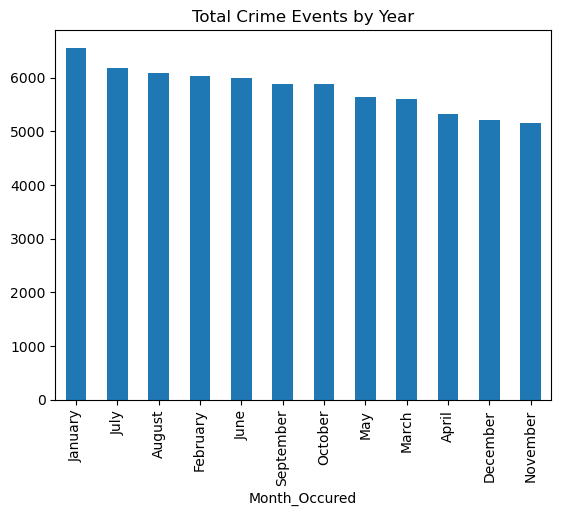

In [38]:
louisville_crime_df_filtered['Month_Occured'].value_counts().plot(kind="bar", title = "Total Crime Events by Year"), plt.savefig('Total Crime Events by Year.png', bbox_inches='tight')

In [39]:
louisville_crime_df_filtered['Time_Occured'] = louisville_crime_df_filtered['Date_Occurred'].dt.time
louisville_crime_df_filtered['Time_Occured']

/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_56248/630707336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  louisville_crime_df_filtered['Time_Occured'] = louisville_crime_df_filtered['Date_Occurred'].dt.time


0        04:00:00
1        05:00:00
2        05:00:00
3        05:00:00
4        05:00:00
           ...   
69613    04:00:00
69614    04:00:00
69615    04:00:00
69616    04:00:00
69617    04:00:00
Name: Time_Occured, Length: 69542, dtype: object

In [40]:
louisville_crime_df_filtered['Time_Occured'].value_counts()

Time_Occured
04:00:00    44811
05:00:00    24731
Name: count, dtype: int64

<Axes: title={'center': 'Total Crime Events by Day'}, xlabel='hours'>

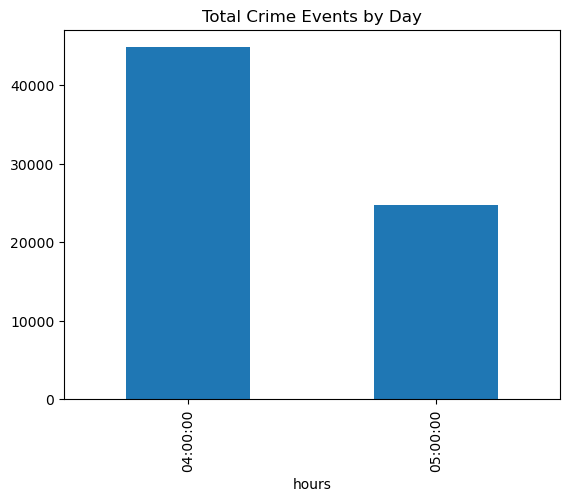

In [41]:
louisville_crime_df_filtered.groupby('Time_Occured').size().plot(kind = 'bar', title ='Total Crime Events by Day', xlabel = 'hours')

(<Axes: title={'center': 'Total of Crime Events by Zip Code'}, ylabel='Zip_Code'>,
 None)

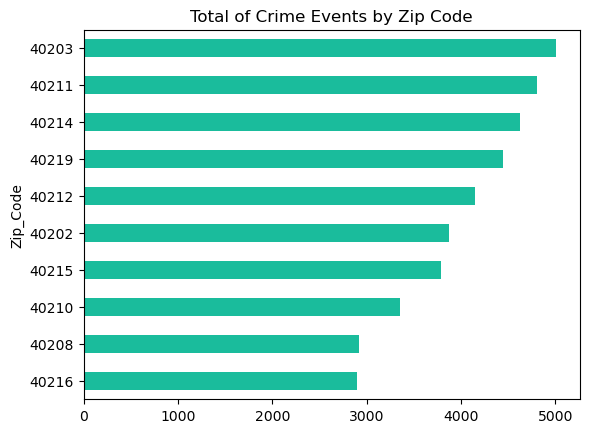

In [42]:
louisville_crime_df_filtered['Zip_Code'].value_counts().head(10).sort_values().plot(kind="barh", color = '#1ABC9C', title = 'Total of Crime Events by Zip Code'), plt.savefig('Total of Crime Events by Zip Code.png')

In [43]:
louisville_crime_df_filtered['Zip_Code'].value_counts().head(10).sort_values()

Zip_Code
40216    2895
40208    2923
40210    3358
40215    3789
40202    3873
40212    4146
40219    4449
40214    4629
40211    4803
40203    5009
Name: count, dtype: int64

In [44]:
top_ten_address=louisville_crime_df_filtered['Block_Address'].value_counts().head(10)
top_ten_address

Block_Address
7900 BLOCK SHELBYVILLE RD        362
100 BLOCK OUTER LOOP             315
400 BLOCK E MUHAMMAD ALI BLVD    298
6600 BLOCK DIXIE HWY             233
4800 BLOCK OUTER LOOP            229
4500 BLOCK POPLAR LEVEL RD       227
3300 BLOCK BARDSTOWN RD          219
400 BLOCK S 6TH ST               155
pending                          155
900 BLOCK PHILLIPS LN            147
Name: count, dtype: int64

In [45]:
#10. create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020
# compare_GDP_per_capita_values = [1990, 2000, 2010, 2020]
# gdp_df_compared = gdp_df[gdp_df['Year'].isin(compare_GDP_per_capita_values)]
# gdp_decades = gdp_df[gdp_df['Year'].isin(compare_GDP_per_capita_values)]
louisville_crime_df_filtered.head(3)

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,...,Location_Category,Block_Address,City,Zip_Code,ObjectId,Offense,Classification,Month_Occured,Year Occured,Time_Occured
0,LMPD24005671,1/16/2024,2023-11-03 04:00:00+00:00,5620.0,14 AUTO THEFT,"TBUT OR DISP AUTO $10,000 < $1,000,000 514.030...",240,A,Yes,2nd Division,...,Commercial/Office Building,1000 BLOCK S 9TH ST,LOUISVILLE,40203,1,14,AUTO THEFT,November,2023,04:00:00
1,LMPD24005377,1/15/2024,2023-12-30 05:00:00+00:00,5619.0,23 THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,Yes,2nd Division,...,Residence/Home,300 BLOCK LOUIS COLEMAN JR DR,LOUISVILLE,40212,2,23,THEFT OTHER,December,2023,05:00:00
2,LMPD24005367,1/15/2024,2023-11-10 05:00:00+00:00,5577.0,23 THEFT OTHER,"TBUT OR DISP ALL OTHERS $500 < $1,000 514.030 ...",23H,A,Yes,6th Division,...,Residence/Home,4100 BLOCK QUIET WAY,LOUISVILLE,40219,3,23,THEFT OTHER,November,2023,05:00:00


In [46]:
crime_2023=louisville_crime_df_filtered[louisville_crime_df_filtered['Year Occured']==2023]
crime_2023

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,...,Location_Category,Block_Address,City,Zip_Code,ObjectId,Offense,Classification,Month_Occured,Year Occured,Time_Occured
0,LMPD24005671,1/16/2024,2023-11-03 04:00:00+00:00,5620.0,14 AUTO THEFT,"TBUT OR DISP AUTO $10,000 < $1,000,000 514.030...",240,A,Yes,2nd Division,...,Commercial/Office Building,1000 BLOCK S 9TH ST,LOUISVILLE,40203,1,14,AUTO THEFT,November,2023,04:00:00
1,LMPD24005377,1/15/2024,2023-12-30 05:00:00+00:00,5619.0,23 THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,Yes,2nd Division,...,Residence/Home,300 BLOCK LOUIS COLEMAN JR DR,LOUISVILLE,40212,2,23,THEFT OTHER,December,2023,05:00:00
2,LMPD24005367,1/15/2024,2023-11-10 05:00:00+00:00,5577.0,23 THEFT OTHER,"TBUT OR DISP ALL OTHERS $500 < $1,000 514.030 ...",23H,A,Yes,6th Division,...,Residence/Home,4100 BLOCK QUIET WAY,LOUISVILLE,40219,3,23,THEFT OTHER,November,2023,05:00:00
3,LMPD24005344,1/15/2024,2023-01-10 05:00:00+00:00,8373.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,Yes,6th Division,...,Parking/ Drop Lot/ Garage,2900 BLOCK HIKES LN,LOUISVILLE,40220,4,14,AUTO THEFT,January,2023,05:00:00
4,LMPD24005434,1/15/2024,2023-12-29 05:00:00+00:00,5621.0,22 THEFT MV PARTS,THEFT OF MOTOR VEHICLE REGISTRATION PLATE/DECA...,23G,A,Yes,7th Division,...,Parking/ Drop Lot/ Garage,8300 BLOCK PRESTONVIEW LN,LOUISVILLE,40219,5,22,THEFT MV PARTS,December,2023,05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69613,LMPD23038783,NaN,2023-05-12 04:00:00+00:00,NaN,46 WPNS LAW VIOLATION,CARRYING A CONCEALED DEADLY WEAPON 527.020 015...,520,A,Yes,1st Division,...,Highway/ Road/ Alley/ Street/ Sidewalk,NaN,LOUISVILLE,40212,69614,46,WPNS LAW VIOLATION,May,2023,04:00:00
69614,LMPD23030938,NaN,2023-04-21 04:00:00+00:00,NaN,34 NARCOTICS,POSS OF MARIJUANA 218A.1422 42330 35A,35A,A,No,4th Division,...,Residence/Home,1200 BLOCK S PRESTON ST,LOUISVILLE,40203,69615,34,NARCOTICS,April,2023,04:00:00
69615,LMPD23089472,NaN,2023-09-26 04:00:00+00:00,NaN,34 NARCOTICS,TRAFF IN CONTROLLED SUBSTANCE 1ST OFFENSE (HER...,35A,A,Yes,4th Division,...,Highway/ Road/ Alley/ Street/ Sidewalk,700 BLOCK HENRY FIRPO ST,LOUISVILLE,40203,69616,34,NARCOTICS,September,2023,04:00:00
69616,LMPD23078486,NaN,2023-08-24 04:00:00+00:00,NaN,46 WPNS LAW VIOLATION,POSSESSION OF HANDGUN BY CONVICTED FELON 527.0...,520,A,Yes,3rd Division,...,Highway/ Road/ Alley/ Street/ Sidewalk,9900 BLOCK DONERAIL WAY,LOUISVILLE,40272,69617,46,WPNS LAW VIOLATION,August,2023,04:00:00


In [47]:
crime_counts_by_zip = louisville_crime_df_filtered.groupby(['Zip_Code', 'Classification']).size().reset_index(name='Count')
crime_counts_by_zip

,Zip_Code,Classification,Count
0,40014,ALL OTHER OFFENSES,1
1,40014,FRAUD CREDIT CARD/ATM,1
2,40018,AGGRAVATED ASSAULT,1
3,40018,ALL OTHER OFFENSES,2
4,40018,AUTO THEFT,3
...,...,...,...
1318,40299,WPNS LAW VIOLATION,5
1319,42701,ALL OTHER OFFENSES,1
1320,47130,INTIMIDATION,2
1321,99999,FORCIBLE RAPE,2


In [48]:
sorted_crimes_by_zip = crime_counts_by_zip.sort_values(['Zip_Code', 'Count'], ascending=[True, False])
sorted_crimes_by_zip

,Zip_Code,Classification,Count
0,40014,ALL OTHER OFFENSES,1
1,40014,FRAUD CREDIT CARD/ATM,1
11,40018,SIMPLE ASSAULT,5
8,40018,LARCENY,4
9,40018,ROBBERY,4
...,...,...,...
1312,40299,THEFT FR VEND MACHINE,1
1319,42701,ALL OTHER OFFENSES,1
1320,47130,INTIMIDATION,2
1321,99999,FORCIBLE RAPE,2


In [49]:
top_crimes_by_zip = sorted_crimes_by_zip.groupby('Zip_Code').head(10)
top_crimes_by_zip

,Zip_Code,Classification,Count
0,40014,ALL OTHER OFFENSES,1
1,40014,FRAUD CREDIT CARD/ATM,1
11,40018,SIMPLE ASSAULT,5
8,40018,LARCENY,4
9,40018,ROBBERY,4
...,...,...,...
1300,40299,LARCENY,32
1319,42701,ALL OTHER OFFENSES,1
1320,47130,INTIMIDATION,2
1321,99999,FORCIBLE RAPE,2


In [50]:
crime_counts_by_month = louisville_crime_df_filtered.groupby(['Month_Occured', 'Classification']).size().reset_index(name='Count')
crime_counts_by_month

,Month_Occured,Classification,Count
0,April,AGGRAVATED ASSAULT,282
1,April,ALL OTHER OFFENSES,607
2,April,ARSON,2
3,April,AUTO THEFT,564
4,April,BURGLARY,273
...,...,...,...
514,September,TRESPASSING,49
515,September,UNAUTHORIZED USE,13
516,September,VANDALISM,553
517,September,VOYEURISM,4


In [51]:
sorted_crimes_by_month = crime_counts_by_month.sort_values(['Month_Occured', 'Count'], ascending=[True, False])
sorted_crimes_by_month

,Month_Occured,Classification,Count
1,April,ALL OTHER OFFENSES,607
3,April,AUTO THEFT,564
32,April,SIMPLE ASSAULT,549
43,April,VANDALISM,471
40,April,THEFT OTHER,394
...,...,...,...
517,September,VOYEURISM,4
487,September,EXTORTION,3
511,September,THEFT FR VEND MACHINE,3
479,September,ARSON,2


In [52]:
top_crimes_by_month = sorted_crimes_by_month.groupby('Month_Occured').head(10)
top_crimes_by_month.head(10)

,Month_Occured,Classification,Count
1,April,ALL OTHER OFFENSES,607
3,April,AUTO THEFT,564
32,April,SIMPLE ASSAULT,549
43,April,VANDALISM,471
40,April,THEFT OTHER,394
19,April,INTIMIDATION,345
37,April,THEFT FR VEH,320
0,April,AGGRAVATED ASSAULT,282
4,April,BURGLARY,273
31,April,SHOPLIFTING,204


(<Axes: title={'center': 'Top Crime in Month'}, xlabel='Month Occured', ylabel='Count'>,
 None)

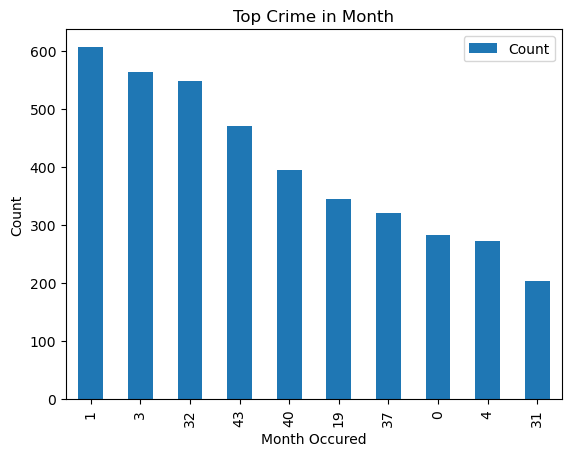

In [53]:
top_crimes_by_month.head(10).plot(kind="bar", xlabel='Month Occured', ylabel='Count', title = "Top Crime in Month"), plt.savefig('Top Crime in Month.png', bbox_inches='tight')

In [54]:
louisville_unemployment_df.head()

# louisville_unemployment_df[['Year', 'Month']] = louisville_unemployment_df['Label'].str.split(' ', expand=True)
# louisville_unemployment_df.head()

,Series ID,Year,Period,Label,Unemployed Rate,Month
0,LAUMT213114000000003,2021,M01,2021 Jan,5.1,Jan
1,LAUMT213114000000003,2021,M02,2021 Feb,4.6,Feb
2,LAUMT213114000000003,2021,M03,2021 Mar,4.6,Mar
3,LAUMT213114000000003,2021,M04,2021 Apr,4.2,Apr
4,LAUMT213114000000003,2021,M05,2021 May,3.8,May


In [55]:
crime_count_by_Month = louisville_crime_df_filtered.groupby('Month_Occured').size()
crime_count_by_Month


Month_Occured
April        5326
August       6086
December     5212
February     6021
January      6554
July         6178
June         6000
March        5610
May          5645
November     5151
October      5875
September    5884
dtype: int64

In [56]:
# crime_count_by_Month.reset_index(name='Crime Count')

crime_count_by_Month_df = crime_count_by_Month.reset_index(name='Crime Count')

In [57]:
crime_count_by_Month_df


,Month_Occured,Crime Count
0,April,5326
1,August,6086
2,December,5212
3,February,6021
4,January,6554
5,July,6178
6,June,6000
7,March,5610
8,May,5645
9,November,5151


In [58]:
import calendar

In [59]:

data = {
    'Month Occured': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Crime Count': [6530, 6024, 5612, 5320, 5644, 5975, 6165, 6071, 5842, 5819, 5003, 1559]
}
crime_count_by_Month_df = pd.DataFrame(data)

abbrev_months = {
    'January': 'Jan',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Apr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Aug',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dec'
}

crime_count_by_Month_df['Month Abb'] = crime_count_by_Month_df['Month Occured'].map(abbrev_months)
print(crime_count_by_Month_df)


   Month Occured  Crime Count Month Abb
0        January         6530       Jan
1       February         6024       Feb
2          March         5612       Mar
3          April         5320       Apr
4            May         5644       May
5           June         5975       Jun
6           July         6165       Jul
7         August         6071       Aug
8      September         5842       Sep
9        October         5819       Oct
10      November         5003       Nov
11      December         1559       Dec


renaming the months to abbreviation for joining

In [60]:
crime_count_by_Month_df

,Month Occured,Crime Count,Month Abb
0,January,6530,Jan
1,February,6024,Feb
2,March,5612,Mar
3,April,5320,Apr
4,May,5644,May
5,June,5975,Jun
6,July,6165,Jul
7,August,6071,Aug
8,September,5842,Sep
9,October,5819,Oct


In [61]:
crime_count_by_Month_df=crime_count_by_Month_df[['Crime Count', 'Month Abb']]
crime_count_by_Month_df.head()

,Crime Count,Month Abb
0,6530,Jan
1,6024,Feb
2,5612,Mar
3,5320,Apr
4,5644,May


In [62]:
louisville_unemployment_df_2023.head(12)

,Year,Unemployed Rate,Month
24,2023,3.8,Jan
25,2023,4.1,Feb
26,2023,3.5,Mar
27,2023,2.8,Apr
28,2023,3.4,May
29,2023,3.8,Jun
30,2023,4.1,Jul
31,2023,3.8,Aug
32,2023,3.7,Sep
33,2023,3.4,Oct


In [63]:
#louisville_unemployment_df_2023 #recheck
# louisville_unemployment_df_month = louisville_unemployment_df_2023[['Unemployed Population', 'Month']]
# louisville_unemployment_df_month
# louisville_unemployment_df_month.reset_index(inplace=True)

In [64]:
data = {
    'Unemployed Population': [3.8, 4.1, 3.5, 2.8, 3.4, 3.8, 4.1, 3.8, 3.7, 3.4, 3.6, 3.3],
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
}
louisville_unemployment_df_month = pd.DataFrame(data)

louisville_unemployment_df_month.reset_index(inplace=True, drop=True)

# Display the DataFrame after resetting the index
louisville_unemployment_df_month.head(12)

,Unemployed Population,Month
0,3.8,Jan
1,4.1,Feb
2,3.5,Mar
3,2.8,Apr
4,3.4,May
5,3.8,Jun
6,4.1,Jul
7,3.8,Aug
8,3.7,Sep
9,3.4,Oct


In [65]:
#merge louisville_unemployment_df_month and crime_count_by_Month_df
crime_unemployment_year = pd.merge(louisville_unemployment_df_month, crime_count_by_Month_df, left_on='Month', right_on='Month Abb', how='inner')
crime_unemployment_year

,Unemployed Population,Month,Crime Count,Month Abb
0,3.8,Jan,6530,Jan
1,4.1,Feb,6024,Feb
2,3.5,Mar,5612,Mar
3,2.8,Apr,5320,Apr
4,3.4,May,5644,May
5,3.8,Jun,5975,Jun
6,4.1,Jul,6165,Jul
7,3.8,Aug,6071,Aug
8,3.7,Sep,5842,Sep
9,3.4,Oct,5819,Oct


In [66]:
#delete the month abb
crime_unemployment_year=crime_unemployment_year[['Unemployed Population','Month','Crime Count']]
crime_unemployment_year

,Unemployed Population,Month,Crime Count
0,3.8,Jan,6530
1,4.1,Feb,6024
2,3.5,Mar,5612
3,2.8,Apr,5320
4,3.4,May,5644
5,3.8,Jun,5975
6,4.1,Jul,6165
7,3.8,Aug,6071
8,3.7,Sep,5842
9,3.4,Oct,5819


In [67]:
avg_crime_per_month=crime_unemployment_year.groupby('Month')['Crime Count'].mean()
avg_crime_per_month

Month
Apr    5320.0
Aug    6071.0
Dec    1559.0
Feb    6024.0
Jan    6530.0
Jul    6165.0
Jun    5975.0
Mar    5612.0
May    5644.0
Nov    5003.0
Oct    5819.0
Sep    5842.0
Name: Crime Count, dtype: float64

(<Axes: title={'center': 'Average Crime Count Month'}, xlabel='Month', ylabel='Crime Count'>,
 None)

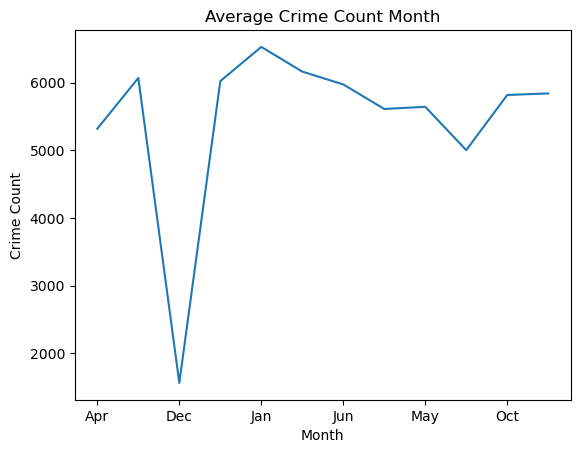

In [68]:
avg_crime_per_month.plot(kind="line", xlabel='Month', ylabel='Crime Count', title = "Average Crime Count Month"), plt.savefig('Average Crime Count Month.png', bbox_inches='tight')

In [69]:
avg_count_per_unemployment=crime_unemployment_year.groupby('Crime Count')['Unemployed Population'].mean()
avg_count_per_unemployment

Crime Count
1559    3.3
5003    3.6
5320    2.8
5612    3.5
5644    3.4
5819    3.4
5842    3.7
5975    3.8
6024    4.1
6071    3.8
6165    4.1
6530    3.8
Name: Unemployed Population, dtype: float64

In [70]:
louisville_crime_df.to_csv('louisville_crime.csv')

# Renaming 'Month_Occured' to Month for efficient merging

In [71]:
louisville_crime_df_filtered.head()

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,...,Location_Category,Block_Address,City,Zip_Code,ObjectId,Offense,Classification,Month_Occured,Year Occured,Time_Occured
0,LMPD24005671,1/16/2024,2023-11-03 04:00:00+00:00,5620.0,14 AUTO THEFT,"TBUT OR DISP AUTO $10,000 < $1,000,000 514.030...",240,A,Yes,2nd Division,...,Commercial/Office Building,1000 BLOCK S 9TH ST,LOUISVILLE,40203,1,14,AUTO THEFT,November,2023,04:00:00
1,LMPD24005377,1/15/2024,2023-12-30 05:00:00+00:00,5619.0,23 THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,Yes,2nd Division,...,Residence/Home,300 BLOCK LOUIS COLEMAN JR DR,LOUISVILLE,40212,2,23,THEFT OTHER,December,2023,05:00:00
2,LMPD24005367,1/15/2024,2023-11-10 05:00:00+00:00,5577.0,23 THEFT OTHER,"TBUT OR DISP ALL OTHERS $500 < $1,000 514.030 ...",23H,A,Yes,6th Division,...,Residence/Home,4100 BLOCK QUIET WAY,LOUISVILLE,40219,3,23,THEFT OTHER,November,2023,05:00:00
3,LMPD24005344,1/15/2024,2023-01-10 05:00:00+00:00,8373.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,Yes,6th Division,...,Parking/ Drop Lot/ Garage,2900 BLOCK HIKES LN,LOUISVILLE,40220,4,14,AUTO THEFT,January,2023,05:00:00
4,LMPD24005434,1/15/2024,2023-12-29 05:00:00+00:00,5621.0,22 THEFT MV PARTS,THEFT OF MOTOR VEHICLE REGISTRATION PLATE/DECA...,23G,A,Yes,7th Division,...,Parking/ Drop Lot/ Garage,8300 BLOCK PRESTONVIEW LN,LOUISVILLE,40219,5,22,THEFT MV PARTS,December,2023,05:00:00


In [72]:
louisville_crime_df_filtered.rename(columns={'Month_Occured': 'Month', 'Year Occured': 'Year'}, inplace=True)
louisville_crime_df.tail(5)

/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_56248/1433493563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  louisville_crime_df_filtered.rename(columns={'Month_Occured': 'Month', 'Year Occured': 'Year'}, inplace=True)


,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,LMPD_Beat,Location_Category,Block_Address,City,Zip_Code,ObjectId,Offense,Classification
69613,LMPD23038783,NaN,2023/05/12 04:00:00+00,NaN,46 WPNS LAW VIOLATION,CARRYING A CONCEALED DEADLY WEAPON 527.020 015...,520,A,Yes,1st Division,112,Highway/ Road/ Alley/ Street/ Sidewalk,NaN,LOUISVILLE,40212.0,69614,46,WPNS LAW VIOLATION
69614,LMPD23030938,NaN,2023/04/21 04:00:00+00,NaN,34 NARCOTICS,POSS OF MARIJUANA 218A.1422 42330 35A,35A,A,No,4th Division,412,Residence/Home,1200 BLOCK S PRESTON ST,LOUISVILLE,40203.0,69615,34,NARCOTICS
69615,LMPD23089472,NaN,2023/09/26 04:00:00+00,NaN,34 NARCOTICS,TRAFF IN CONTROLLED SUBSTANCE 1ST OFFENSE (HER...,35A,A,Yes,4th Division,412,Highway/ Road/ Alley/ Street/ Sidewalk,700 BLOCK HENRY FIRPO ST,LOUISVILLE,40203.0,69616,34,NARCOTICS
69616,LMPD23078486,NaN,2023/08/24 04:00:00+00,NaN,46 WPNS LAW VIOLATION,POSSESSION OF HANDGUN BY CONVICTED FELON 527.0...,520,A,Yes,3rd Division,315,Highway/ Road/ Alley/ Street/ Sidewalk,9900 BLOCK DONERAIL WAY,LOUISVILLE,40272.0,69617,46,WPNS LAW VIOLATION
69617,LMPD23038783,NaN,2023/05/12 04:00:00+00,NaN,35 NARCOTICS EQUIP,DRUG PARAPHERNALIA - BUY/POSSESS 218A.500(2) 4...,35B,A,Yes,1st Division,112,Highway/ Road/ Alley/ Street/ Sidewalk,NaN,LOUISVILLE,40212.0,69618,35,NARCOTICS EQUIP


In [73]:
louisville_crime_df_filtered['Month'] = louisville_crime_df_filtered['Month'].astype(str)
louisville_crime_df_filtered['Year'] = louisville_crime_df_filtered['Year'].astype(str)

louisville_unemployment_df_2023['Month'] = louisville_unemployment_df_2023['Month'].astype(str)
louisville_unemployment_df_2023['Year'] = louisville_unemployment_df_2023['Year'].astype(str)

/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_56248/1015991549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  louisville_crime_df_filtered['Month'] = louisville_crime_df_filtered['Month'].astype(str)
/var/folders/th/jsjzrfgj5mqb0ntmxxmc9pmm0000gn/T/ipykernel_56248/1015991549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  louisville_crime_df_filtered['Year'] = louisville_crime_df_filtered['Year'].astype(str)


Convert Data Types to string so that i can join. 

In [74]:
louis_crime_unemployment_df = pd.merge(louisville_crime_df_filtered, louisville_unemployment_df_2023, on=["Month", "Year"], how="left")
louis_crime_unemployment_df

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,...,Block_Address,City,Zip_Code,ObjectId,Offense,Classification,Month,Year,Time_Occured,Unemployed Rate
0,LMPD24005671,1/16/2024,2023-11-03 04:00:00+00:00,5620.0,14 AUTO THEFT,"TBUT OR DISP AUTO $10,000 < $1,000,000 514.030...",240,A,Yes,2nd Division,...,1000 BLOCK S 9TH ST,LOUISVILLE,40203,1,14,AUTO THEFT,November,2023,04:00:00,NaN
1,LMPD24005377,1/15/2024,2023-12-30 05:00:00+00:00,5619.0,23 THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,Yes,2nd Division,...,300 BLOCK LOUIS COLEMAN JR DR,LOUISVILLE,40212,2,23,THEFT OTHER,December,2023,05:00:00,NaN
2,LMPD24005367,1/15/2024,2023-11-10 05:00:00+00:00,5577.0,23 THEFT OTHER,"TBUT OR DISP ALL OTHERS $500 < $1,000 514.030 ...",23H,A,Yes,6th Division,...,4100 BLOCK QUIET WAY,LOUISVILLE,40219,3,23,THEFT OTHER,November,2023,05:00:00,NaN
3,LMPD24005344,1/15/2024,2023-01-10 05:00:00+00:00,8373.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,Yes,6th Division,...,2900 BLOCK HIKES LN,LOUISVILLE,40220,4,14,AUTO THEFT,January,2023,05:00:00,NaN
4,LMPD24005434,1/15/2024,2023-12-29 05:00:00+00:00,5621.0,22 THEFT MV PARTS,THEFT OF MOTOR VEHICLE REGISTRATION PLATE/DECA...,23G,A,Yes,7th Division,...,8300 BLOCK PRESTONVIEW LN,LOUISVILLE,40219,5,22,THEFT MV PARTS,December,2023,05:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69537,LMPD23038783,NaN,2023-05-12 04:00:00+00:00,NaN,46 WPNS LAW VIOLATION,CARRYING A CONCEALED DEADLY WEAPON 527.020 015...,520,A,Yes,1st Division,...,NaN,LOUISVILLE,40212,69614,46,WPNS LAW VIOLATION,May,2023,04:00:00,3.4
69538,LMPD23030938,NaN,2023-04-21 04:00:00+00:00,NaN,34 NARCOTICS,POSS OF MARIJUANA 218A.1422 42330 35A,35A,A,No,4th Division,...,1200 BLOCK S PRESTON ST,LOUISVILLE,40203,69615,34,NARCOTICS,April,2023,04:00:00,NaN
69539,LMPD23089472,NaN,2023-09-26 04:00:00+00:00,NaN,34 NARCOTICS,TRAFF IN CONTROLLED SUBSTANCE 1ST OFFENSE (HER...,35A,A,Yes,4th Division,...,700 BLOCK HENRY FIRPO ST,LOUISVILLE,40203,69616,34,NARCOTICS,September,2023,04:00:00,NaN
69540,LMPD23078486,NaN,2023-08-24 04:00:00+00:00,NaN,46 WPNS LAW VIOLATION,POSSESSION OF HANDGUN BY CONVICTED FELON 527.0...,520,A,Yes,3rd Division,...,9900 BLOCK DONERAIL WAY,LOUISVILLE,40272,69617,46,WPNS LAW VIOLATION,August,2023,04:00:00,NaN


Left join seem to work best for the joining, it retains the original number of rows from the beginning. 

# ANALYSIS- Offenses Above and Below 2.17 unemployed rate

In [75]:
avg_unemployed_rate=round(louis_crime_unemployment_df['Unemployed Rate'].mean(), 2)
avg_unemployed_rate

3.4

In [76]:
#What crimes are committed when the average population is below 3.4?
crime_below_avg = louis_crime_unemployment_df.loc[louis_crime_unemployment_df['Unemployed Rate'] <=3.4, 'Classification']
crime_below_avg.value_counts().head(20)

Classification
ALL OTHER OFFENSES       702
SIMPLE ASSAULT           644
VANDALISM                550
AUTO THEFT               539
THEFT OTHER              395
INTIMIDATION             388
THEFT FR VEH             305
AGGRAVATED ASSAULT       287
BURGLARY                 259
NARCOTICS                204
SHOPLIFTING              203
LARCENY                  120
THEFT MV PARTS           119
THEFT FR BLDG            115
FAMILY OFFENSES          115
ROBBERY                   96
FRAUD CREDIT CARD/ATM     79
NARCOTICS EQUIP           67
WPNS LAW VIOLATION        58
FRAUD IMPERSONATION       49
Name: count, dtype: int64

In [77]:
#What crimes are committed when the average population is below 3.4?
crime_above_avg = louis_crime_unemployment_df.loc[louis_crime_unemployment_df['Unemployed Rate'] >=3.4, 'Classification']
crime_above_avg.value_counts().head(20)

Classification
ALL OTHER OFFENSES       702
SIMPLE ASSAULT           644
VANDALISM                550
AUTO THEFT               539
THEFT OTHER              395
INTIMIDATION             388
THEFT FR VEH             305
AGGRAVATED ASSAULT       287
BURGLARY                 259
NARCOTICS                204
SHOPLIFTING              203
LARCENY                  120
THEFT MV PARTS           119
THEFT FR BLDG            115
FAMILY OFFENSES          115
ROBBERY                   96
FRAUD CREDIT CARD/ATM     79
NARCOTICS EQUIP           67
WPNS LAW VIOLATION        58
FRAUD IMPERSONATION       49
Name: count, dtype: int64

In [78]:
crime_count_by_number=louis_crime_unemployment_df['Classification'].value_counts()
crime_count_by_number.head(20)

Classification
ALL OTHER OFFENSES       7820
AUTO THEFT               6939
SIMPLE ASSAULT           6822
VANDALISM                6552
THEFT OTHER              4636
INTIMIDATION             4384
THEFT FR VEH             3948
BURGLARY                 3429
AGGRAVATED ASSAULT       3368
SHOPLIFTING              2641
NARCOTICS                2572
NON-REPORTABLE           2266
LARCENY                  1587
FAMILY OFFENSES          1539
THEFT MV PARTS           1466
THEFT FR BLDG            1448
ROBBERY                  1026
FRAUD CREDIT CARD/ATM    1021
STOLEN PROPERTY           828
NARCOTICS EQUIP           740
Name: count, dtype: int64

From my analysis of the average population, it seems more crimes are committed when if the average unemployed rate is above 3.4 than when it is below 3.4 unemployed

In [79]:
louis_crime_unemployment_df.columns


Index(['Incident_Number', 'Date_Reported', 'Date_Occurred', 'Badge_ID',
       'Offense_Classification', 'Offense_Code_Name', 'NIBRS_Code',
       'NIBRS_Group', 'Was_Offense_Completed', 'LMPD_Division', 'LMPD_Beat',
       'Location_Category', 'Block_Address', 'City', 'Zip_Code', 'ObjectId',
       'Offense', 'Classification', 'Month', 'Year', 'Time_Occured',
       'Unemployed Rate'],
      dtype='object')

# Analysis by Classification', 'AUTO THEFT' and location category

In [80]:
crime_auto_theft =louis_crime_unemployment_df.loc[louis_crime_unemployment_df['Classification'].isin(['AUTO THEFT'])]
crime_auto_theft.head()

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,...,Block_Address,City,Zip_Code,ObjectId,Offense,Classification,Month,Year,Time_Occured,Unemployed Rate
0,LMPD24005671,1/16/2024,2023-11-03 04:00:00+00:00,5620.0,14 AUTO THEFT,"TBUT OR DISP AUTO $10,000 < $1,000,000 514.030...",240,A,Yes,2nd Division,...,1000 BLOCK S 9TH ST,LOUISVILLE,40203,1,14,AUTO THEFT,November,2023,04:00:00,NaN
3,LMPD24005344,1/15/2024,2023-01-10 05:00:00+00:00,8373.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,Yes,6th Division,...,2900 BLOCK HIKES LN,LOUISVILLE,40220,4,14,AUTO THEFT,January,2023,05:00:00,NaN
13,LMPD24004632,1/12/2024,2023-12-14 05:00:00+00:00,8560.0,14 AUTO THEFT,"TBUT OR DISP AUTO $10,000 < $1,000,000 514.030...",240,A,Yes,3rd Division,...,9000 BLOCK STONESTREET RD,LOUISVILLE,40272,14,14,AUTO THEFT,December,2023,05:00:00,NaN
18,LMPD24004188,1/11/2024,2023-12-27 05:00:00+00:00,8373.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,Yes,3rd Division,...,15900 BLOCK DIXIE HWY,LOUISVILLE,40177,19,14,AUTO THEFT,December,2023,05:00:00,NaN
23,LMPD24003903,1/10/2024,2023-01-02 05:00:00+00:00,8544.0,14 AUTO THEFT,"TBUT OR DISP AUTO $10,000 < $1,000,000 514.030...",240,A,Yes,1st Division,...,3000 BLOCK W BROADWAY,LOUISVILLE,40211,24,14,AUTO THEFT,January,2023,05:00:00,NaN


In [81]:
zip_auto_theft_count=crime_auto_theft['Zip_Code'].value_counts()
zip_auto_theft_count.head(15)

Zip_Code
40214    592
40211    534
40219    516
40212    449
40203    436
40215    358
40202    353
40208    320
40216    318
40210    284
40272    274
40204    273
40218    271
40258    235
40291    209
Name: count, dtype: int64

In [82]:
location_count=crime_auto_theft['Location_Category'].value_counts()
location_count.head(19)

Location_Category
Parking/ Drop Lot/ Garage                 2360
Residence/Home                            2322
Highway/ Road/ Alley/ Street/ Sidewalk    1262
Other Residence (Apartment/Condo)          524
Service/Gas Station                         64
Auto Dealership New/Used                    63
Other/Unknown                               50
Commercial/Office Building                  40
Hotel/ Motel/ Etc.                          37
Convenience Store                           24
Restaurant                                  23
Bar/Nightclub                               18
Government/ Public Building                 16
Grocery/ Supermarket                        15
Park/ Playground                            15
Specialty Store                             14
Drug Store/Doctor's Office/Hospital         11
Rental Storage Facility                     10
Department/Discount Store                    9
Name: count, dtype: int64

In [83]:
# crime_auto_theft['Time_Occured']

In [84]:
time_auto_theft=crime_auto_theft['Time_Occured'].value_counts()
time_auto_theft

Time_Occured
04:00:00    4574
05:00:00    2365
Name: count, dtype: int64

it either the time input were wrong or something is the issue, the time stamp does not vary. 

In [85]:
crime_auto_location=crime_auto_theft.loc[crime_auto_theft['Location_Category'].isin(['Residence/Home'])]
crime_auto_location.head()

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,...,Block_Address,City,Zip_Code,ObjectId,Offense,Classification,Month,Year,Time_Occured,Unemployed Rate
143,LMPD24000075,12/31/2023,2023-12-31 05:00:00+00:00,8402.0,14 AUTO THEFT,"TBUT OR DISP AUTO $10,000 < $1,000,000 514.030...",240,A,Yes,2nd Division,...,600 BLOCK CECIL AVE,LOUISVILLE,40211,144,14,AUTO THEFT,December,2023,05:00:00,NaN
293,LMPD24000194,1/1/2024,2023-12-31 05:00:00+00:00,8373.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,Yes,6th Division,...,5300 BLOCK RIDGECREST RD,LOUISVILLE,40218,295,14,AUTO THEFT,December,2023,05:00:00,NaN
525,LMPD23129182,12/30/2023,2023-12-30 05:00:00+00:00,5591.0,14 AUTO THEFT,"TBUT OR DISP AUTO $10,000 < $1,000,000 514.030...",240,A,Yes,3rd Division,...,7500 BLOCK BLUE WING DR,LOUISVILLE,40258,527,14,AUTO THEFT,December,2023,05:00:00,NaN
526,LMPD23129128,12/30/2023,2023-12-30 05:00:00+00:00,8566.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,Yes,2nd Division,...,600 BLOCK S 44TH ST,LOUISVILLE,40211,528,14,AUTO THEFT,December,2023,05:00:00,NaN
577,LMPD23128844,12/29/2023,2023-12-28 05:00:00+00:00,8560.0,14 AUTO THEFT,"TBUT OR DISP AUTO $10,000 < $1,000,000 514.030...",240,A,No,7th Division,...,9500 BLOCK RIDGESIDE DR,LOUISVILLE,40291,579,14,AUTO THEFT,December,2023,05:00:00,NaN


In [86]:
zip_auto_theft_location_count=crime_auto_location['Zip_Code'].value_counts()
zip_auto_theft_location_count

Zip_Code
40211    261
40212    204
40214    183
40215    155
40210    137
40216    134
40219    121
40203    112
40272    107
40208    101
40229     86
40258     83
40218     73
40204     71
40217     58
40206     50
40291     48
40213     39
40220     36
40205     35
40245     32
40299     29
40228     29
40241     27
40118     21
40222     16
40223     15
40242     13
40202     12
40059     12
40207     11
40243      6
40023      3
40209      2
Name: count, dtype: int64

In [87]:
time_residence_theft=crime_auto_location['Time_Occured'].value_counts()
time_residence_theft

Time_Occured
04:00:00    1611
05:00:00     711
Name: count, dtype: int64

In [88]:
adress_residence_theft=crime_auto_location['Block_Address'].value_counts()
adress_residence_theft

Block_Address
600 BLOCK S 39TH ST             7
100 BLOCK E KINGSTON AVE        6
2400 BLOCK S 4TH ST             5
100 BLOCK N 32ND ST             5
3400 BLOCK CATHE DYKSTRA WAY    5
                               ..
6300 BLOCK MISTFLOWER CIR       1
1100 BLOCK WELLER AVE           1
7000 BLOCK BRONNER CIR          1
7500 BLOCK BEECHVIEW WAY        1
4500 BLOCK S 1ST ST             1
Name: count, Length: 1844, dtype: int64

In [89]:
# adress_residence_theft=crime_auto_location['LMPD_Beat'].value_counts()
# adress_residence_theft

# AVG crime in a location and avg beat per location

In [90]:
# Group by 'Location_Category' and count the number of classifications within each category
classification_counts = louis_crime_unemployment_df.groupby('Location_Category')['Classification'].value_counts()
classification_counts

Location_Category       Classification       
ATM Separate From Bank  FRAUD CREDIT CARD/ATM    9
                        COUNTERFEITING           2
                        VANDALISM                2
                        ROBBERY                  2
                        THEFT OTHER              1
                                                ..
Specialty Store         SODOMY FORCE             1
                        STAT RAPE                1
                        THEFT FR VEND MACHINE    1
                        TRESPASSING              1
                        UNAUTHORIZED USE         1
Name: count, Length: 1099, dtype: int64

In [91]:
avg_crime_location = round(classification_counts.groupby(level='Location_Category').mean(), 2)
avg_crime_location = avg_crime_location.sort_values(ascending=False)
avg_crime_location.head(20)

Location_Category
Residence/Home                            573.08
Highway/ Road/ Alley/ Street/ Sidewalk    213.79
Parking/ Drop Lot/ Garage                 198.85
Other Residence (Apartment/Condo)         158.65
Department/Discount Store                  63.32
Other/Unknown                              55.18
Convenience Store                          32.52
Commercial/Office Building                 32.29
Service/Gas Station                        31.36
Cyberspace                                 30.77
Specialty Store                            29.62
Restaurant                                 27.73
Drug Store/Doctor's Office/Hospital        23.34
Grocery/ Supermarket                       21.39
Hotel/ Motel/ Etc.                         21.31
Non-Attached Resd Garage/Shed/Buld         16.93
Park/ Playground                           16.16
Rental Storage Facility                    15.59
Shopping Mall                              13.62
Bar/Nightclub                              13.33
Na

Calculate the mean of these counts for each 'Location_Category' and i sort the results in descending order

In [92]:
louis_crime_unemployment_df.columns

Index(['Incident_Number', 'Date_Reported', 'Date_Occurred', 'Badge_ID',
       'Offense_Classification', 'Offense_Code_Name', 'NIBRS_Code',
       'NIBRS_Group', 'Was_Offense_Completed', 'LMPD_Division', 'LMPD_Beat',
       'Location_Category', 'Block_Address', 'City', 'Zip_Code', 'ObjectId',
       'Offense', 'Classification', 'Month', 'Year', 'Time_Occured',
       'Unemployed Rate'],
      dtype='object')

In [93]:
beats_location_counts=louis_crime_unemployment_df.groupby('LMPD_Beat')['Location_Category'].value_counts()
beats_location_counts

LMPD_Beat  Location_Category                     
1          Residence/Home                            20
           Highway/ Road/ Alley/ Street/ Sidewalk     8
           Parking/ Drop Lot/ Garage                  3
           Other/Unknown                              3
           Hotel/ Motel/ Etc.                         2
                                                     ..
WB         School - Elementary/Secondary              1
           Restaurant                                 1
           Drug Store/Doctor's Office/Hospital        1
           Convenience Store                          1
           Commercial/Office Building                 1
Name: count, Length: 1461, dtype: int64

LMPD beats are the designated patrol areas within the Louisville Metro area, located in Kentucky

In [94]:
avg_beats_location = round(beats_location_counts.groupby(level='Location_Category').mean(), 2)
avg_crime_location = avg_beats_location.sort_values(ascending=False)
avg_crime_location.head(20)

Location_Category
Residence/Home                                   473.95
Highway/ Road/ Alley/ Street/ Sidewalk           156.63
Other Residence (Apartment/Condo)                146.15
Parking/ Drop Lot/ Garage                        141.52
Department/Discount Store                         39.24
Other/Unknown                                     38.71
Hotel/ Motel/ Etc.                                26.61
Service/Gas Station                               24.02
Commercial/Office Building                        23.04
Specialty Store                                   22.40
Gambling Facility/ Casino/ Race Track             21.67
Convenience Store                                 20.58
Restaurant                                        20.56
Shopping Mall                                     16.86
Drug Store/Doctor's Office/Hospital               16.58
Grocery/ Supermarket                              16.35
Jail/Prison/Penitentiary/Corrections Facility     14.50
Shelter - Mission/ Homeless   

In [95]:
zip_codes_to_remove_again = ['47130','99999']
louis_crime_unemployment_df= louis_crime_unemployment_df[~louis_crime_unemployment_df['Zip_Code'].isin(zip_codes_to_remove_again)]

In [96]:
beats_zip_counts=louis_crime_unemployment_df.groupby('LMPD_Beat')['Zip_Code'].value_counts()
beats_zip_counts

LMPD_Beat  Zip_Code
1          40208        7
           40216        5
           40203        4
           40212        4
           40211        4
                       ..
STM        40222        5
           40205        2
           40206        1
WB         40218       56
           40211        1
Name: count, Length: 427, dtype: int64

In [97]:
avg_beats_zip = round(beats_zip_counts.groupby(level='Zip_Code').mean(), 1)
avg_beats_zip = avg_beats_zip.sort_values(ascending=False)
avg_beats_zip.head(50)

Zip_Code
40211    319.1
40241    290.2
40214    287.6
40204    267.1
40212    258.3
40202    241.4
40215    236.1
40229    225.5
40208    224.4
40210    222.5
40219    210.8
40203    208.5
40218    196.1
40272    179.8
40217    176.9
40258    157.4
40213    152.8
40245    138.4
40291    137.6
40118    129.8
40216    125.3
40206    124.2
40209    107.3
40220    100.5
40228     90.1
40205     79.8
40299     76.8
40222     74.0
40059     70.3
40207     49.8
40223     38.1
40242     37.2
40243     26.8
40018     19.0
40023     16.3
40225     15.0
40041     11.0
40177      6.7
40025      3.0
40047      3.0
40165      2.0
40231      2.0
40071      1.0
40108      1.0
40175      1.0
40014      1.0
Name: count, dtype: float64

This code helps me determine which zip codes are most prevalent in each beat, beats with a high diversity of zip codes and potential crime patterns or hotspots based on zip code distribution.


In [98]:
# zip_codes_to_remove_again = ['47130','99999']
# louis_crime_unemployment_df= louis_crime_unemployment_df[~louis_crime_unemployment_df['Zip_Code'].isin(zip_codes_to_remove_again)]

From this analysis, it becomes clear that there are more 40211 has higher beat that any other zip in Louisville, The people living in ZIP code 40211 are primarily black or African American. 

In [99]:
crime_zip_counts=louis_crime_unemployment_df.groupby('Classification')['Zip_Code'].value_counts()
crime_zip_counts

Classification      Zip_Code
AGGRAVATED ASSAULT  40211       349
                    40203       341
                    40212       290
                    40210       252
                    40215       238
                               ... 
WPNS LAW VIOLATION  40245         2
                    40291         2
                    40243         2
                    40223         1
                    40242         1
Name: count, Length: 1320, dtype: int64

In [100]:
avg_crime_zip_counts = round(crime_zip_counts.groupby(level='Zip_Code').mean(), 1)
avg_crime_zip_counts = avg_crime_zip_counts.sort_values(ascending=False)
avg_crime_zip_counts.head(25)

Zip_Code
40211    114.0
40203    113.5
40214    107.6
40219    105.8
40212    100.9
40215     88.0
40202     86.0
40210     81.7
40216     76.1
40208     72.9
40272     70.5
40218     67.1
40258     59.8
40213     59.7
40204     50.8
40229     45.4
40206     43.5
40241     41.7
40220     40.0
40291     39.4
40217     37.6
40245     29.5
40205     29.4
40299     26.4
40228     25.4
Name: count, dtype: float64

from this analysis, it becomes clear that the avg LMPD beats does not mean less crime but the number of times a police office might have gone there to check for a crime or when they are being called in. 40211, an african american community tops the analysis in average crime per zip code and in average beats per zip code. 

In [101]:
louis_crime_unemployment_df.head()

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,...,Block_Address,City,Zip_Code,ObjectId,Offense,Classification,Month,Year,Time_Occured,Unemployed Rate
0,LMPD24005671,1/16/2024,2023-11-03 04:00:00+00:00,5620.0,14 AUTO THEFT,"TBUT OR DISP AUTO $10,000 < $1,000,000 514.030...",240,A,Yes,2nd Division,...,1000 BLOCK S 9TH ST,LOUISVILLE,40203,1,14,AUTO THEFT,November,2023,04:00:00,NaN
1,LMPD24005377,1/15/2024,2023-12-30 05:00:00+00:00,5619.0,23 THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,Yes,2nd Division,...,300 BLOCK LOUIS COLEMAN JR DR,LOUISVILLE,40212,2,23,THEFT OTHER,December,2023,05:00:00,NaN
2,LMPD24005367,1/15/2024,2023-11-10 05:00:00+00:00,5577.0,23 THEFT OTHER,"TBUT OR DISP ALL OTHERS $500 < $1,000 514.030 ...",23H,A,Yes,6th Division,...,4100 BLOCK QUIET WAY,LOUISVILLE,40219,3,23,THEFT OTHER,November,2023,05:00:00,NaN
3,LMPD24005344,1/15/2024,2023-01-10 05:00:00+00:00,8373.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,Yes,6th Division,...,2900 BLOCK HIKES LN,LOUISVILLE,40220,4,14,AUTO THEFT,January,2023,05:00:00,NaN
4,LMPD24005434,1/15/2024,2023-12-29 05:00:00+00:00,5621.0,22 THEFT MV PARTS,THEFT OF MOTOR VEHICLE REGISTRATION PLATE/DECA...,23G,A,Yes,7th Division,...,8300 BLOCK PRESTONVIEW LN,LOUISVILLE,40219,5,22,THEFT MV PARTS,December,2023,05:00:00,NaN


In [102]:
louis_crime_unemployment_df.columns

Index(['Incident_Number', 'Date_Reported', 'Date_Occurred', 'Badge_ID',
       'Offense_Classification', 'Offense_Code_Name', 'NIBRS_Code',
       'NIBRS_Group', 'Was_Offense_Completed', 'LMPD_Division', 'LMPD_Beat',
       'Location_Category', 'Block_Address', 'City', 'Zip_Code', 'ObjectId',
       'Offense', 'Classification', 'Month', 'Year', 'Time_Occured',
       'Unemployed Rate'],
      dtype='object')

In [103]:
louis_crime_unemployment_df['Classification'].value_counts

<bound method IndexOpsMixin.value_counts of 0                AUTO THEFT
1               THEFT OTHER
2               THEFT OTHER
3                AUTO THEFT
4            THEFT MV PARTS
                ...        
69537    WPNS LAW VIOLATION
69538             NARCOTICS
69539             NARCOTICS
69540    WPNS LAW VIOLATION
69541       NARCOTICS EQUIP
Name: Classification, Length: 69537, dtype: object>

In [104]:
crime_type =louis_crime_unemployment_df.loc[louis_crime_unemployment_df['Classification'].isin(['AGGRAVATED ASSAULT'])]
crime_type

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,...,Block_Address,City,Zip_Code,ObjectId,Offense,Classification,Month,Year,Time_Occured,Unemployed Rate
106,LMPD23129714,12/31/2023,2023-12-31 05:00:00+00:00,5259.0,9 AGGRAVATED ASSAULT,STRANGULATION 1ST DEGREE 508.170 13225 13A,13A,A,Yes,8th Division,...,11100 BLOCK INDIAN LEGENDS DR,LOUISVILLE,40241,107,9,AGGRAVATED ASSAULT,December,2023,05:00:00,NaN
115,LMPD23129688,12/31/2023,2023-12-31 05:00:00+00:00,5500.0,9 AGGRAVATED ASSAULT,STRANGULATION 1ST DEGREE 508.170 13225 13A,13A,A,Yes,2nd Division,...,200 BLOCK S 42ND ST,LOUISVILLE,40212,116,9,AGGRAVATED ASSAULT,December,2023,05:00:00,NaN
125,LMPD23129472,12/31/2023,2023-12-31 05:00:00+00:00,5561.0,9 AGGRAVATED ASSAULT,WANTON ENDANGERMENT-1ST DEGREE 508.060 13201 13A,13A,A,Yes,7th Division,...,1100 BLOCK CLAY AVE,LOUISVILLE,40219,126,9,AGGRAVATED ASSAULT,December,2023,05:00:00,NaN
136,LMPD24000070,12/31/2023,2023-12-31 05:00:00+00:00,5599.0,9 AGGRAVATED ASSAULT,WANTON ENDANGERMENT-1ST DEGREE 508.060 13201 13A,13A,A,Yes,3rd Division,...,1700 BLOCK BRICK KILN LN,LOUISVILLE,40216,137,9,AGGRAVATED ASSAULT,December,2023,05:00:00,NaN
148,LMPD23129659,12/31/2023,2023-12-31 05:00:00+00:00,5518.0,9 AGGRAVATED ASSAULT,WANTON ENDANGERMENT-1ST DEGREE 508.060 13201 13A,13A,A,Yes,1st Division,...,2400 BLOCK W MARKET ST,LOUISVILLE,40212,149,9,AGGRAVATED ASSAULT,December,2023,05:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69399,8023000121,1/1/2023,2023-01-01 05:00:00+00:00,5129.0,9 AGGRAVATED ASSAULT,STRANGULATION 1ST DEGREE 508.170 13225 13A,13A,A,Yes,2nd Division,...,700 BLOCK S 42ND ST,LOUISVILLE,40211,69475,9,AGGRAVATED ASSAULT,January,2023,05:00:00,NaN
69423,8023000229,1/1/2023,2023-01-01 05:00:00+00:00,5224.0,9 AGGRAVATED ASSAULT,WANTON ENDANGERMENT-1ST DEGREE 508.060 13201 13A,13A,A,Yes,3rd Division,...,4800 BLOCK SADDLEBROOK LN,LOUISVILLE,40216,69499,9,AGGRAVATED ASSAULT,January,2023,05:00:00,NaN
69488,8023000208,1/1/2023,2023-01-01 05:00:00+00:00,5531.0,9 AGGRAVATED ASSAULT,WANTON ENDANGERMENT-1ST DEGREE 508.060 13201 13A,13A,A,Yes,1st Division,...,2400 BLOCK DUNCAN ST,LOUISVILLE,40212,69564,9,AGGRAVATED ASSAULT,January,2023,05:00:00,NaN
69499,8023000367,1/2/2023,2023-01-02 05:00:00+00:00,5287.0,9 AGGRAVATED ASSAULT,WANTON ENDANGERMENT-1ST DEGREE 508.060 13201 13A,13A,A,Yes,4th Division,...,900 BLOCK DENMARK ST,LOUISVILLE,40215,69575,9,AGGRAVATED ASSAULT,January,2023,05:00:00,NaN


In [105]:
crime_type_count=crime_type['Location_Category'].value_counts()
crime_type_count.head(10)

Location_Category
Residence/Home                            1679
Highway/ Road/ Alley/ Street/ Sidewalk     602
Other Residence (Apartment/Condo)          544
Parking/ Drop Lot/ Garage                  123
Service/Gas Station                         51
Other/Unknown                               43
Park/ Playground                            38
Bar/Nightclub                               35
Hotel/ Motel/ Etc.                          34
Convenience Store                           32
Name: count, dtype: int64

# Analysis "Weapons Law Violation", location, date occured and block address and month

In [106]:
crime_law_violation=louis_crime_unemployment_df.loc[louis_crime_unemployment_df['Classification'].isin(['WPNS LAW VIOLATION'])]
crime_law_violation

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,...,Block_Address,City,Zip_Code,ObjectId,Offense,Classification,Month,Year,Time_Occured,Unemployed Rate
220,LMPD24001959,1/5/2024,2023-01-05 05:00:00+00:00,5003.0,46 WPNS LAW VIOLATION,POSSESSION OF FIREARM BY CONVICTED FELON 527.0...,520,A,Yes,6th Division,...,3300 BLOCK BARDSTOWN RD,LOUISVILLE,40218,222,46,WPNS LAW VIOLATION,January,2023,05:00:00,NaN
366,LMPD24000048,12/31/2023,2023-12-31 05:00:00+00:00,5113.0,46 WPNS LAW VIOLATION,UNLAWFULLY PROV/PERMIT MINOR TO POSSESS HANDGU...,520,A,Yes,5th Division,...,900 BLOCK BAXTER AVE,LOUISVILLE,40204,368,46,WPNS LAW VIOLATION,December,2023,05:00:00,NaN
392,LMPD23129485,12/31/2023,2023-12-31 05:00:00+00:00,5335.0,46 WPNS LAW VIOLATION,POSSESSION OF HANDGUN BY CONVICTED FELON 527.0...,520,A,Yes,1st Division,...,S 26TH ST / W BROADWAY,LOUISVILLE,40211,394,46,WPNS LAW VIOLATION,December,2023,05:00:00,NaN
545,LMPD23129230,12/30/2023,2023-12-30 05:00:00+00:00,7311.0,46 WPNS LAW VIOLATION,POSSESSION OF HANDGUN BY CONVICTED FELON 527.0...,520,A,Yes,1st Division,...,900 BLOCK READ ALY,LOUISVILLE,40203,547,46,WPNS LAW VIOLATION,December,2023,05:00:00,NaN
674,LMPD23129202,12/30/2023,2023-12-30 05:00:00+00:00,5429.0,46 WPNS LAW VIOLATION,POSSESSION OF HANDGUN BY CONVICTED FELON 527.0...,520,A,Yes,2nd Division,...,1200 BLOCK S 12TH ST,LOUISVILLE,40210,676,46,WPNS LAW VIOLATION,December,2023,05:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69469,8023000375,1/2/2023,2023-01-02 05:00:00+00:00,7692.0,46 WPNS LAW VIOLATION,POSSESSION OF HANDGUN BY CONVICTED FELON 527.0...,520,A,Yes,6th Division,...,6200 BLOCK SHEPHERDSVILLE RD,LOUISVILLE,40228,69545,46,WPNS LAW VIOLATION,January,2023,05:00:00,NaN
69524,8023000488,1/2/2023,2023-01-02 05:00:00+00:00,5152.0,46 WPNS LAW VIOLATION,POSSESSION OF HANDGUN BY CONVICTED FELON 527.0...,520,A,Yes,2nd Division,...,NaN,LOUISVILLE,40211,69600,46,WPNS LAW VIOLATION,January,2023,05:00:00,NaN
69531,LMPD23032374,NaN,2023-04-25 04:00:00+00:00,NaN,46 WPNS LAW VIOLATION,POSSESSION OF HANDGUN BY CONVICTED FELON 527.0...,520,A,Yes,2nd Division,...,1600 BLOCK HALE AVE,LOUISVILLE,40210,69607,46,WPNS LAW VIOLATION,April,2023,04:00:00,NaN
69537,LMPD23038783,NaN,2023-05-12 04:00:00+00:00,NaN,46 WPNS LAW VIOLATION,CARRYING A CONCEALED DEADLY WEAPON 527.020 015...,520,A,Yes,1st Division,...,NaN,LOUISVILLE,40212,69614,46,WPNS LAW VIOLATION,May,2023,04:00:00,3.4


'WPNS LAW VIOLATION' likely refers to a "Weapons Law Violation" in the context of crime reports or legal records. In Louisville, Kentucky, as in other jurisdictions, this term would typically denote an incident where an individual has violated local, state, or federal laws pertaining to the possession, carrying, or use of firearms or other weapons.

In [107]:
crime_law_violation['Date_Occurred'].value_counts()

Date_Occurred
2023-02-26 05:00:00+00:00    10
2023-02-22 05:00:00+00:00    10
2023-06-13 04:00:00+00:00     9
2023-01-10 05:00:00+00:00     7
2023-09-08 04:00:00+00:00     7
                             ..
2023-05-23 04:00:00+00:00     1
2023-12-03 05:00:00+00:00     1
2023-05-15 04:00:00+00:00     1
2023-05-10 04:00:00+00:00     1
2023-05-25 04:00:00+00:00     1
Name: count, Length: 308, dtype: int64

In [108]:
crime_law_violation['Block_Address'].value_counts()

Block_Address
pending                            10
5400 BLOCK YE OLD POST RD           5
3300 BLOCK BARDSTOWN RD             4
400 BLOCK S 8TH ST                  4
7300 BLOCK MONSEY CIR               4
                                   ..
SOUTHWESTERN PKY / LARKWOOD AVE     1
1100 BLOCK W JEFFERSON ST           1
3000 BLOCK VIRGINIA AVE             1
1200 BLOCK HOMEVIEW DR              1
9900 BLOCK DONERAIL WAY             1
Name: count, Length: 487, dtype: int64

In [109]:
crime_law_violation['Location_Category'].value_counts()

Location_Category
Highway/ Road/ Alley/ Street/ Sidewalk           313
Residence/Home                                   184
Parking/ Drop Lot/ Garage                         59
Other Residence (Apartment/Condo)                 34
Other/Unknown                                     27
Service/Gas Station                               19
Park/ Playground                                  19
Convenience Store                                 17
School - Elementary/Secondary                     12
Grocery/ Supermarket                               8
Restaurant                                         7
Drug Store/Doctor's Office/Hospital                6
Department/Discount Store                          6
Hotel/ Motel/ Etc.                                 5
Liquor Store                                       3
Bar/Nightclub                                      3
Commercial/Office Building                         2
Abandoned/Condemned Structure                      2
School College              

In [113]:
crime_law_violation['Month'].value_counts()

Month
February     86
January      74
June         71
July         67
August       61
September    59
May          58
October      54
April        54
March        53
November     49
December     48
Name: count, dtype: int64

# Analysis, narcotics, location and block address

In [110]:
crime_law_narcotics=louis_crime_unemployment_df.loc[louis_crime_unemployment_df['Classification'].isin(['NARCOTICS'])]
crime_law_narcotics

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,...,Block_Address,City,Zip_Code,ObjectId,Offense,Classification,Month,Year,Time_Occured,Unemployed Rate
117,LMPD23129607,12/31/2023,2023-12-31 05:00:00+00:00,5129.0,34 NARCOTICS,TRAF IN CONT SUB-1ST OFFENSE 218A.1404(1) 4201...,999,B,Yes,2nd Division,...,3300 BLOCK W MARKET ST,LOUISVILLE,40212,118,34,NARCOTICS,December,2023,05:00:00,NaN
142,LMPD23129511,12/31/2023,2023-12-31 05:00:00+00:00,5560.0,34 NARCOTICS,POSS OF MARIJUANA 218A.1422 42330 35A,35A,A,Yes,7th Division,...,NaN,LOUISVILLE,40219,143,34,NARCOTICS,December,2023,05:00:00,NaN
149,LMPD23129599,12/31/2023,2023-12-31 05:00:00+00:00,5148.0,34 NARCOTICS,POSS OF MARIJUANA 218A.1422 42330 35A,35A,A,Yes,4th Division,...,900 BLOCK PHILLIPS LN,LOUISVILLE,40209,150,34,NARCOTICS,December,2023,05:00:00,NaN
170,LMPD23129505,12/31/2023,2023-12-31 05:00:00+00:00,5131.0,34 NARCOTICS,POSS OF MARIJUANA 218A.1422 42330 35A,35A,A,Yes,4th Division,...,DENMARK ST / CLIFF AVE,LOUISVILLE,40214,172,34,NARCOTICS,December,2023,05:00:00,NaN
253,LMPD24000789,1/2/2024,2023-01-02 05:00:00+00:00,5342.0,34 NARCOTICS,POSS OF MARIJUANA 218A.1422 42330 35A,35A,A,Yes,4th Division,...,3700 BLOCK TAYLOR BLVD,LOUISVILLE,40215,255,34,NARCOTICS,January,2023,05:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69529,LMPD23032374,NaN,2023-04-25 04:00:00+00:00,NaN,34 NARCOTICS,POSS CONT SUB-1ST DEGREE-1ST OFFENSE-COCAINE 2...,35A,A,Yes,2nd Division,...,1600 BLOCK HALE AVE,LOUISVILLE,40210,69605,34,NARCOTICS,April,2023,04:00:00,NaN
69530,LMPD23030403,NaN,2023-04-20 04:00:00+00:00,NaN,34 NARCOTICS,POSS CONT SUB-1ST DEGREE-1ST OFFENSE-HEROIN 21...,35A,A,No,JEFFERSONTOWN,...,1200 BLOCK KENTUCKY MILLS DR,JEFFERSONTOWN,40299,69606,34,NARCOTICS,April,2023,04:00:00,NaN
69533,LMPD23030415,NaN,2023-04-20 04:00:00+00:00,NaN,34 NARCOTICS,POSS CONT SUB-1ST DEGREE-1ST OFFENSE-HEROIN 21...,35A,A,Yes,1st Division,...,2600 BLOCK W JEFFERSON ST,LOUISVILLE,40212,69609,34,NARCOTICS,April,2023,04:00:00,NaN
69538,LMPD23030938,NaN,2023-04-21 04:00:00+00:00,NaN,34 NARCOTICS,POSS OF MARIJUANA 218A.1422 42330 35A,35A,A,No,4th Division,...,1200 BLOCK S PRESTON ST,LOUISVILLE,40203,69615,34,NARCOTICS,April,2023,04:00:00,NaN


In [111]:
narcotics_crime_location=crime_law_narcotics['Location_Category'].value_counts()
narcotics_crime_location

Location_Category
Highway/ Road/ Alley/ Street/ Sidewalk           1352
Residence/Home                                    359
Parking/ Drop Lot/ Garage                         211
Service/Gas Station                               102
Park/ Playground                                   85
Convenience Store                                  73
Other Residence (Apartment/Condo)                  73
Other/Unknown                                      62
Department/Discount Store                          41
Restaurant                                         34
Hotel/ Motel/ Etc.                                 24
Grocery/ Supermarket                               22
Jail/Prison/Penitentiary/Corrections Facility      21
Commercial/Office Building                         15
Liquor Store                                       13
Drug Store/Doctor's Office/Hospital                11
Abandoned/Condemned Structure                       8
Specialty Store                                     8
Bar/Nightc

In [112]:
crime_law_narcotics['Block_Address'].value_counts()

Block_Address
pending                        34
400 BLOCK S 6TH ST             22
4500 BLOCK W BROADWAY          21
4500 BLOCK POPLAR LEVEL RD     18
3700 BLOCK RIVER RD            17
                               ..
W HILL ST / S 28TH ST           1
W MANSLICK RD / ASHCROFT RD     1
0 BLOCK I265S                   1
7000 BLOCK RAGGARD RD           1
700 BLOCK HENRY FIRPO ST        1
Name: count, Length: 1178, dtype: int64

In [114]:
crime_law_narcotics['Month'].value_counts()

Month
February     303
January      284
July         257
June         217
September    214
May          204
August       202
December     191
October      182
November     178
April        175
March        165
Name: count, dtype: int64

from the forgoing, it appears that narcotics and "Weapons Law Violation" which are the two of the highest crime reported in Louisville, KY happens most of the time along Highway/ Road/ Alley/ Street/ Sidewalk, followed by Residence/Home, which public places like School College                                      1
Construction Site                                   1
Shelter - Mission/ Homeless                         1
Arena/Stadium/Fairgrounds/Coliseum                  1
Community Center                                    1
Bank/Savings and Loan                               1
Industrial Site happen to be where less crimes are committed. Also, February seem to the highest number of crime count for "Weapons Law Violation" and "narcotics"

JUST FYI, I REDOWNLOADED THE LOUISVILLE FILE INCASE IT WAS UPDATED TO HAVE MORE DETAILS ABOUT DECEMBER. 